In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 24/01/2020
Initialization for S1PL, Notebook was last run on: 24/01/2020


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance(data_before, data_after):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)
    
    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=10, linestyle="", linewidth=0.5, color='navy')
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance', fontsize=26)
    plt.tick_params(labelsize=20)
    plt.ylim(0,1.05)

In [4]:
file_path = '/dali/lgrandi/ccapelli/haxcache/final_SR1/selections/'
data = hax.minitrees.load_cache_file(file_path+'bkg_SR1_pax6.10.1_forMichelle.haxcache')

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/minitrees.py:611: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.cut_history = store.get_storer('data').attrs.cut_history


In [5]:
for i in data.columns: print(i)

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s1_tight_coincidence
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_eve

##### Pre-selection: 
- CutS2SingleScatter_HE, CutDAQVeto, CutFlash, CutMuonVeto, CutS2Threshold, CutCS2AreaFractionTopExtended, CutS1AreaFractionTop_he, CutPosDiff_HE, CutS2Width_HE, CutS1SingleScatter_HE, CutS2PatternLikelihoodHE

In [6]:
### Mi interessa ottimizzare il cut per gli eventi al di sotto di S1 = 2x10^4 PE
data['CES'] = CES(data, 'cs2_bottom_nn_tf')
data = data[data['s1']<3e4]

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


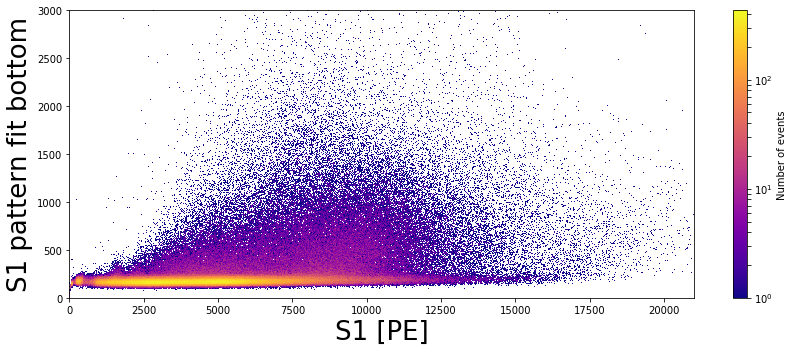

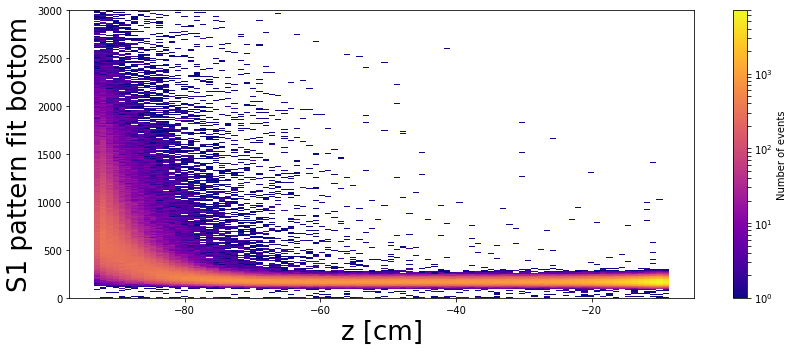

In [7]:
plt.figure(figsize=(12, 5))
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins = (1000, 400), 
           range=((0, 2.1e4), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.hist2d(data['z_3d_nn_tf'], data['s1_pattern_fit_bottom_hax'], bins = (100, 400), 
           range=((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


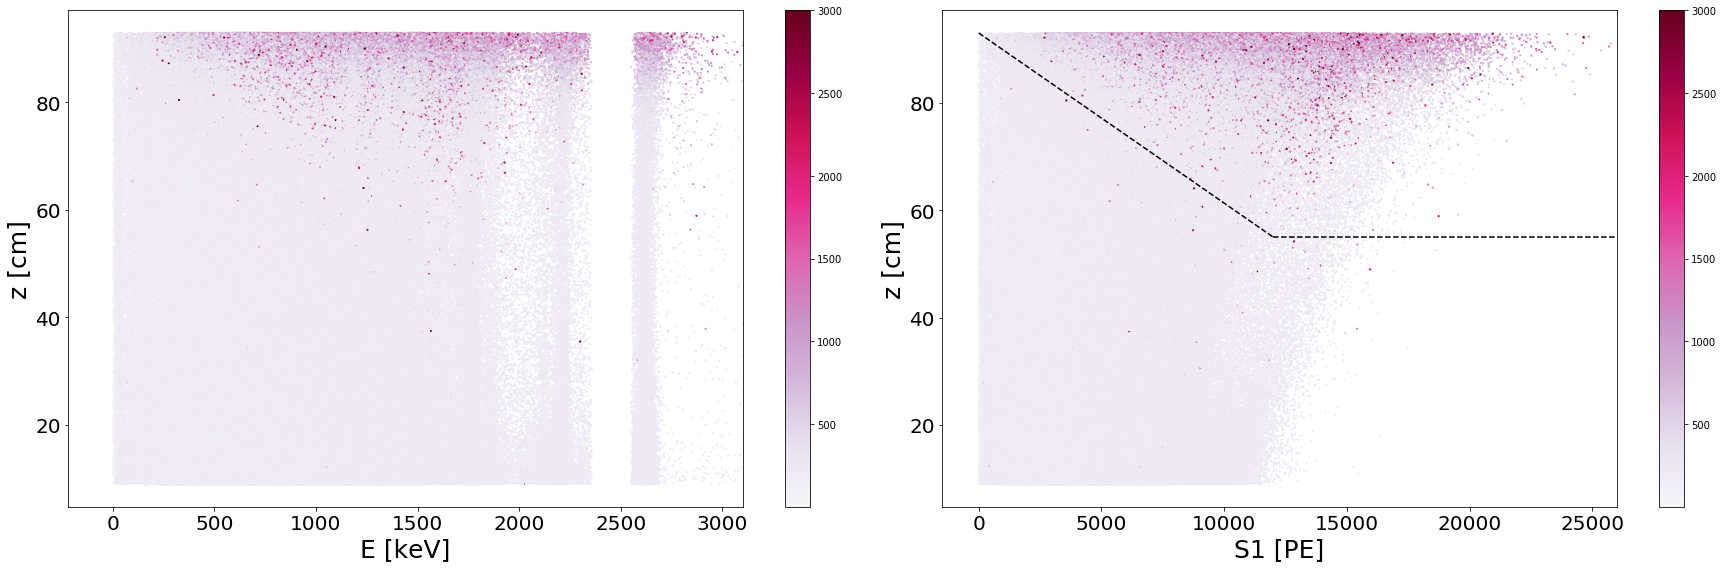

In [8]:
##############################################
### Guadiamo come (E,z,S1pl) e (S1,z,S1pl) ###

x_1 = np.linspace(0, 1.2e4, 1e3)
x_2 = np.linspace(1.2e4, 3e4, 1e2)
m_1 = (93. - 55.)/(0. - 12000.)
m_2 = 0
q_1 = 93.
q_2 = 55.
y_1 = m_1*x_1 + q_1
y_2 = m_2*x_2 + q_2

fig = plt.figure(figsize=(25,8))

plt.subplot(121)
points_1 = plt.scatter(data['CES']/10**3, -data['z_3d_nn_tf'], c = data['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_1)
plt.xlim(right=3100)
plt.xlabel('E [keV]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.subplot(122)
points_2 = plt.scatter(data['s1'], -data['z_3d_nn_tf'], c = data['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_2)
plt.plot(x_1, y_1, 'k--')
plt.plot(x_2, y_2, 'k--')
plt.xlim(right=26000)
plt.xlabel('S1 [PE]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

In [9]:
def region(df):
    x_1 = 1.2e4
    m_1 = (93. - 55.)/(0. - 12000.)
    q_1 = 93.
    q_2 = 55.
    first_line  = (df['s1']<=x_1)&(-df['z_3d_nn_tf']<(df['s1']*m_1+q_1))
    second_line = (df['s1']>x_1)&(-df['z_3d_nn_tf']<(df['s1']*m_2+q_2))
    return first_line|second_line

data['S1_z_region'] = region(data)
data_fr = data[data['S1_z_region']==True]  # Dati nella prima regione, al di sotto della linea
data_sr = data[data['S1_z_region']==False] # Dati nella seconda regione

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


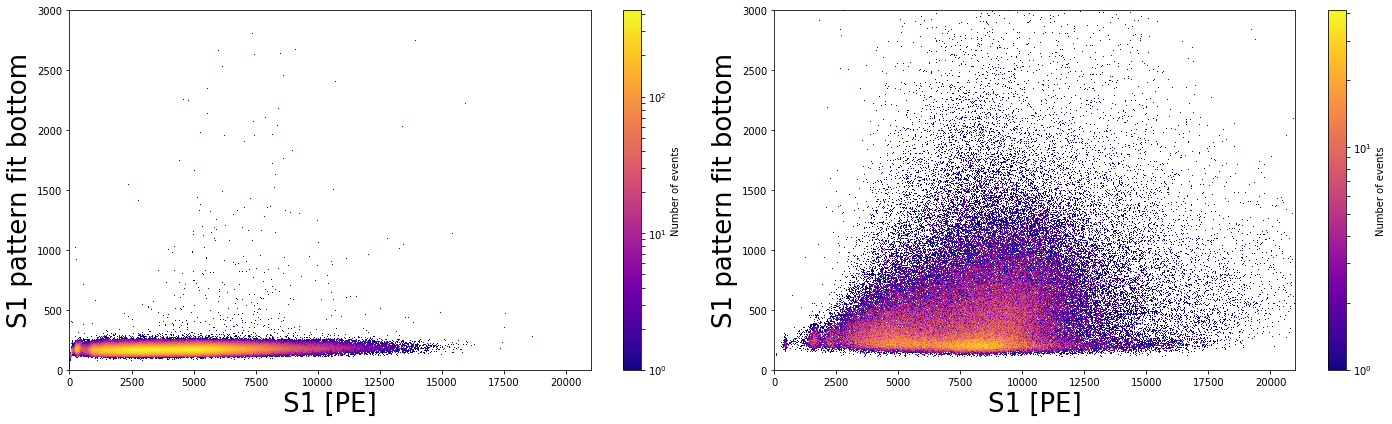

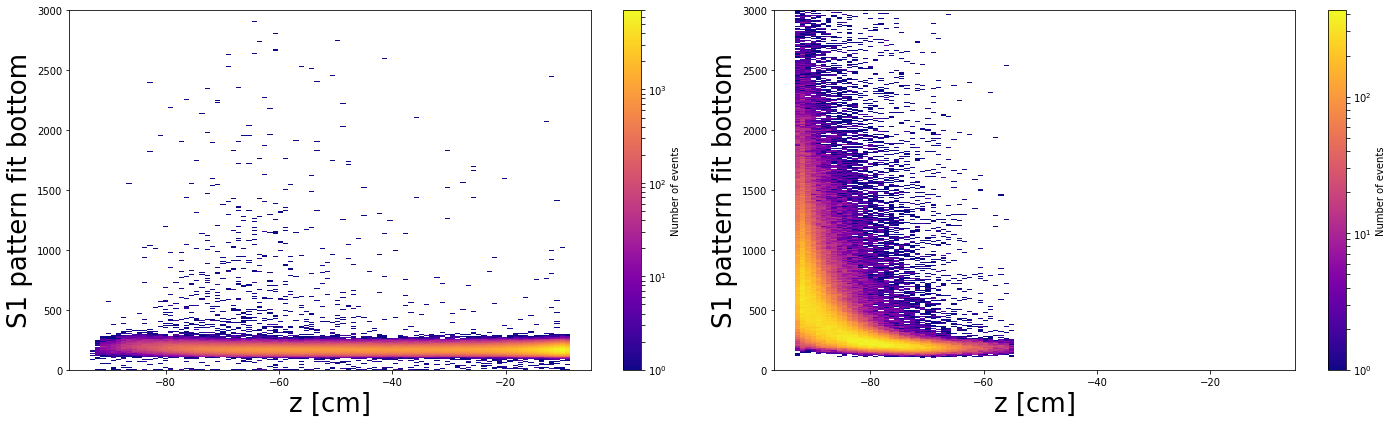

In [10]:
#####################################
### (S1; S1 pl) delle due regioni ###

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (1000, 400), range=((0, 2.1e4), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.subplot(122)
plt.hist2d(data_sr['s1'], data_sr['s1_pattern_fit_bottom_hax'], bins = (1000, 400), range=((0, 2.1e4), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tight_layout()
plt.show()

####################################
### (z; S1 pl) delle due regioni ###
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'], bins = (100, 400), range=((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.subplot(122)
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (100, 400), range=((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tight_layout()
plt.show()

### Cut on z
- first region
- second region

  0%|          | 0/49 [00:00<?, ?it/s]/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|██████████| 49/49 [00:05<00:00,  8.50it/s]


popt_z:
  [2.60877947e+02 1.97247525e-03 1.20372322e-01] 

pcov_z: 
 [[ 1.19882421e-01 -1.65096735e-04  9.77287387e-04]
 [-1.65096735e-04  7.69883936e-07 -4.71128136e-06]
 [ 9.77287387e-04 -4.71128136e-06  2.88967497e-05]]
popt_z:
  [1.03477720e+02 3.53078631e-02] 

pcov_z: 
 [[4.63803239e+00 7.40208055e-02]
 [7.40208055e-02 1.45138835e-03]]
------ My function ------
######
Degrees of freedom
38
######
Chi2 value
0.38715255679300936
######
Critical value
52.192319730102874
######
P value
1.0


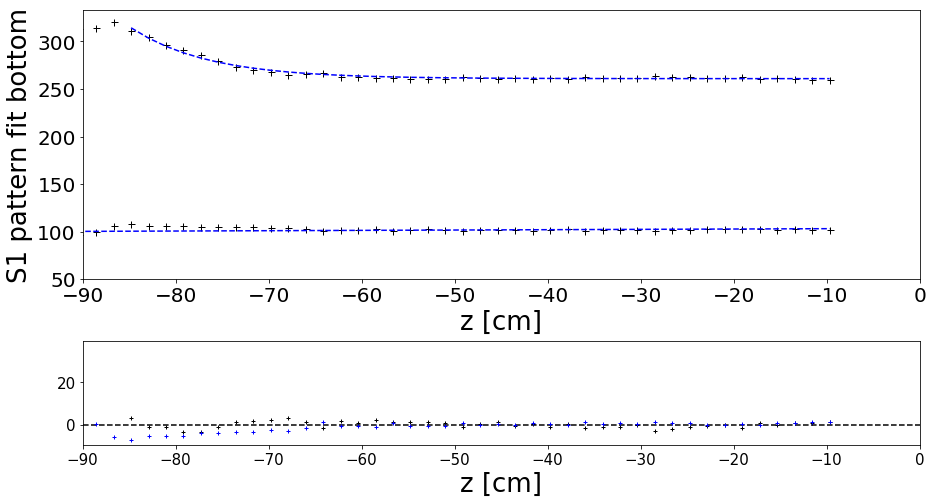

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


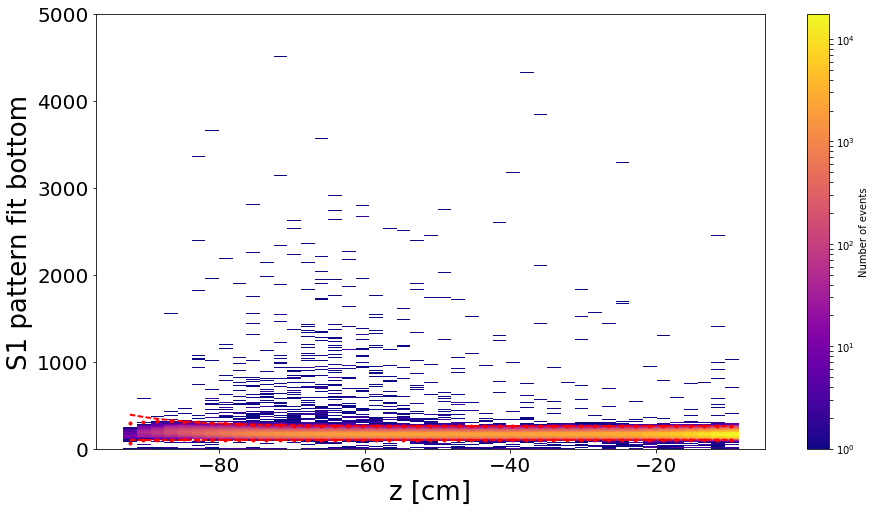

In [11]:
####################################################
### determino gli input per i fit, sono definiti ###
### come lo 0.03% e il 99.7% della distribuzione ###
### normale per ogni slice in z_3d_nn_tf         ###

xbins = np.linspace(-97, -5, 50)
ybins = np.linspace(0, 5e3, 500)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_fr['z_3d_nn_tf'], 
                                          data_fr['s1_pattern_fit_bottom_hax'],
                                          bins=(xbins, ybins))

ybins_center_z = np.asarray([0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)])
xbins_center_z = np.asarray([0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)])

perc_z_high = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z_high[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                                q=0.9999, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
xbins_center_valid_z_high_fr, perc_valid_z_high_fr = dropNaNforFit(xbins_center_z, perc_z_high)

perc_z_low = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z_low[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                               q=0.003, var1='z_3d_nn_tf', var2='s1 patter fit hax')

xbins_center_valid_z_low_fr, perc_valid_z_low_fr = dropNaNforFit(xbins_center_z, perc_z_low)
# perc_valid -> 99% s1 pattern fit in s1 slice
# xbins_center_valid -> correspondent s1 to 99,7% s1 pattern fit
del hist_1, xbins_1, ybins_1


####################################################
### Fit del limite superiore nella prima regione ###
init_z_high_fr = [2.16014992e+02, 9.26515951e-04, 1.69452500e-01]
mask_1 = np.where(xbins_center_valid_z_high_fr>-85)

popt_z_high_fr, pcov_z_high_fr = curve_fit(exp, xbins_center_valid_z_high_fr[mask_1], perc_valid_z_high_fr[mask_1], p0=init_z_high_fr)
print('popt_z:\n ', popt_z_high_fr ,'\n\npcov_z: \n', pcov_z_high_fr)

####################################################

####################################################
### Fit del limite inferiore nella prima regione ###

init_z_low_fr = [100, 0]

popt_z_low_fr, pcov_z_low_fr = curve_fit(poly1, xbins_center_valid_z_low_fr, perc_valid_z_low_fr, p0=init_z_low_fr)
print('popt_z:\n ', popt_z_low_fr ,'\n\npcov_z: \n', pcov_z_low_fr)

####################################################

plt.figure(figsize=(15,8))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

plt.subplot(grid[:2, :])

plt.plot(xbins_center_valid_z_high_fr, perc_valid_z_high_fr, 'k+', ms = 7)
plt.plot(xbins_center_valid_z_high_fr[mask_1], exp(xbins_center_valid_z_high_fr[mask_1], *popt_z_high_fr), 'b--')

plt.plot(xbins_center_valid_z_low_fr, perc_valid_z_low_fr, 'k+', ms = 7)
plt.plot(xbins_center_valid_z_low_fr, poly1(xbins_center_valid_z_low_fr, *popt_z_low_fr), 'b--')

plt.xlim(-90,0)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(grid[2, :])
plt.plot(xbins_center_valid_z_high_fr[mask_1], exp(xbins_center_valid_z_high_fr[mask_1], *popt_z_high_fr) - perc_valid_z_high_fr[mask_1], 'k+', ms=4)
plt.plot(xbins_center_valid_z_low_fr, poly1(xbins_center_valid_z_low_fr, *popt_z_low_fr)  - perc_valid_z_low_fr,  'b+', ms=4)

plt.hlines(y=0, xmin=-90, xmax = 0 , linestyles='dashed')
plt.xlim(-90,0)
plt.xlabel('z [cm]', fontsize=26)
plt.tick_params(labelsize=15)

p_ , chi2_ = compute_chi2_p_2(perc_valid_z_high_fr[mask_1], exp(xbins_center_valid_z_high_fr[mask_1], *popt_z_high_fr), len(popt_z_high_fr))

###########################################
### Plot del limite nella prima regione ###
y_h = exp(xbins_center_valid_z_high_fr, *popt_z_high_fr)
y_l = poly1(xbins_center_valid_z_low_fr, *popt_z_low_fr)

plt.figure(figsize=(15,8))
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.plot(xbins_center_valid_z_high_fr, perc_valid_z_high_fr, 'ro', ms = 3)
plt.plot(xbins_center_valid_z_high_fr, perc_valid_z_low_fr, 'ro', ms = 3)

plt.plot(xbins_center_valid_z_low_fr, y_h, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')
plt.plot(xbins_center_valid_z_low_fr, y_l, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')

plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)

plt.tick_params(labelsize=20)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


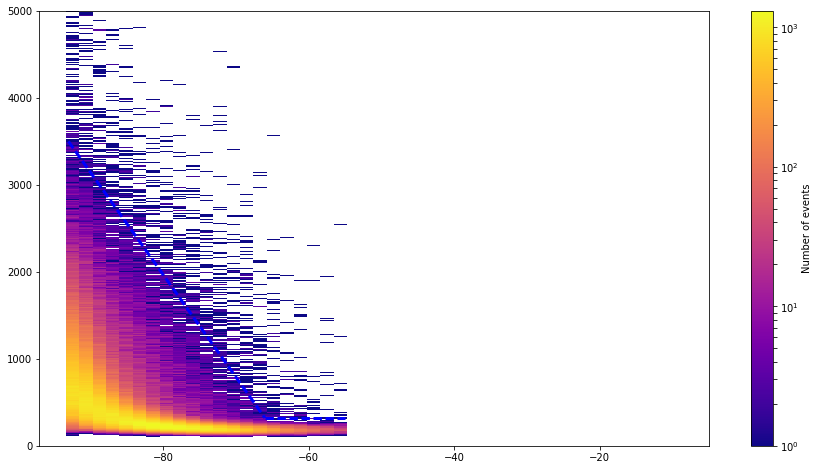

In [12]:
plt.figure(figsize=(15,8))
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (50, 400), 
           range = ((-97, -5), (0, 5e3)),
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

m = (3500. - 320.)/(-93. + 66.)
q = m*(+66) + 320
x_1 = np.linspace(-93,-66, 50)
y_1 = m*x_1 +q
x_2 = np.linspace(-66,-55, 50)
y_2 = 320 + x_2*0
plt.plot(x_1, y_1, 'b--', lw=3)
plt.plot(x_2, y_2, 'b--', lw=3)

In [13]:
######################################################
### determino gli input per i fit, sono definiti   ###
### come lo 0.03% e il 99.999% della distribuzione ###
### normale per ogni slice in z_3d_nn_tf           ###
 
m = (3500. - 320.)/(-93. + 66.)
q = m*(+66) + 320
data_sr_tmp = data_sr[((data_sr['s1_pattern_fit_bottom_hax']<(m*data_sr['z_3d_nn_tf'] + q))&(data_sr['z_3d_nn_tf']<-66))|((data_sr['s1_pattern_fit_bottom_hax']<(320))&(data_sr['z_3d_nn_tf']>-66))]

100%|██████████| 14/14 [00:02<00:00,  6.54it/s]


popt_z:
  [1.10549131e+02 3.64364369e-02] 

pcov_z: 
 [[2.00373410e+02 2.78961649e+00]
 [2.78961649e+00 3.91328966e-02]]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


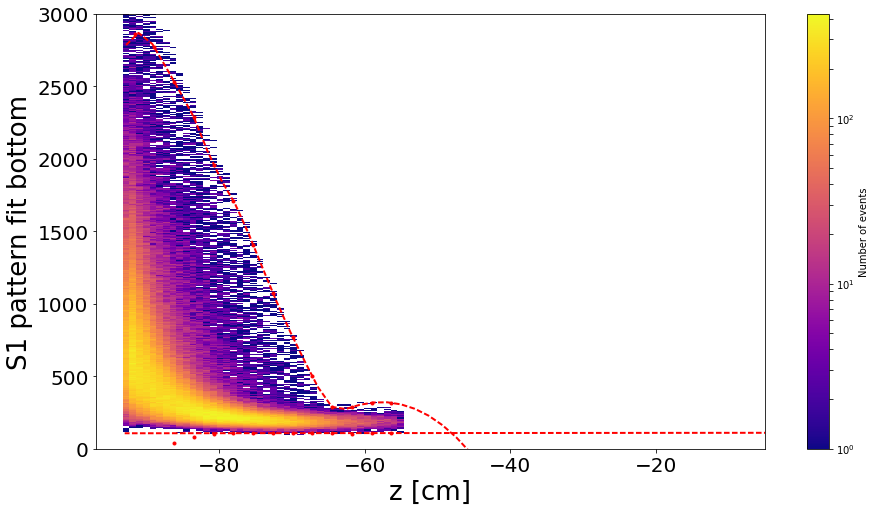

In [14]:
xbins = np.linspace(-93, -55, 15)
ybins = np.linspace(0, 3e3, 100)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_sr_tmp['z_3d_nn_tf'], 
                                          data_sr_tmp['s1_pattern_fit_bottom_hax'],
                                          bins=(xbins, ybins))

ybins_center_z = np.asarray([0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)])
xbins_center_z = np.asarray([0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)])

#perc_z_high = np.empty(len(xbins_center_z))
#for i in tqdm(range(len(hist_1))):
#    perc_z_high[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
#                                q=0.9999999, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
perc_z_high = percentile_numeric(hist=hist_1, ybins=ybins_1, xbins=xbins_1, q=0.999)
xbins_center_valid_z_high_sr, perc_valid_z_high_sr = dropNaNforFit(xbins_center_z, perc_z_high)

perc_z_low = np.empty(len(xbins_center_z))
for i in tqdm(range(len(hist_1))):
    perc_z_low[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                               q=0.003, var1='z_3d_nn_tf', var2='s1 patter fit hax')
    
#perc_z_low = percentile_numeric(hist=hist_1, ybins=ybins_1, xbins=xbins_1, q=0.003)
xbins_center_valid_z_low_sr, perc_valid_z_low_sr = dropNaNforFit(xbins_center_z, perc_z_low)
# perc_valid -> 99% s1 pattern fit in s1 slice
# xbins_center_valid -> correspondent s1 to 99,7% s1 pattern fit
del hist_1, xbins_1, ybins_1


####################################################
### Fit del limite superiore nella prima regione ###
#init_z_high_sr = [2.16014992e+02, 9.26515951e-04, 1.69452500e-01]

#popt_z_high_sr, pcov_z_high_sr = curve_fit(exp, xbins_center_valid_z_high_sr, perc_valid_z_high_sr, p0=init_z_high_sr)
#print('popt_z:\n ', popt_z_high_sr ,'\n\npcov_z: \n', pcov_z_high_sr)

spl_z = interpolate.InterpolatedUnivariateSpline(xbins_center_valid_z_high_sr, perc_valid_z_high_sr, k = 3)

with open('./cut_line/interpolator_z.pkl', 'wb') as f:
    pickle.dump(spl_z, f)
####################################################

####################################################
### Fit del limite inferiore nella prima regione ###
### Vengono presi in cosiderazione solo i valori ###
### tra -80 cm e -60 cm                          ###

init_z_low_sr = [100, 0]
mask = np.where((xbins_center_valid_z_low_sr<-61)&(xbins_center_valid_z_low_sr>-81))
popt_z_low_sr, pcov_z_low_sr = curve_fit(poly1, xbins_center_valid_z_low_sr[mask], perc_valid_z_low_sr[mask], p0=init_z_low_sr)
print('popt_z:\n ', popt_z_low_sr ,'\n\npcov_z: \n', pcov_z_low_sr)

###########################################
### Plot del limite nella prima regione ###
xx = np.linspace(0, -93, 50)
y_h = spl_z(xx)
#y_h = exp(xx, *popt_z_high_sr)
y_l = poly1(xx, *popt_z_low_sr)

plt.figure(figsize=(15,8))
plt.hist2d(data_sr_tmp['z_3d_nn_tf'], data_sr_tmp['s1_pattern_fit_bottom_hax'], bins = (100, 400), range = ((-97, -5), (0, 3e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.plot(xbins_center_valid_z_high_sr, perc_valid_z_high_sr, 'ro', ms = 3)
plt.plot(xbins_center_valid_z_low_sr, perc_valid_z_low_sr, 'ro', ms = 3)

plt.plot(xx, y_h, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')
plt.plot(xx, y_l, 'r--', lw = 2, label = 'S1 Pattern Likelihood Cut')

plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [15]:
#####################################
### Parametri per il taglio su z  ###
### con relativa funzione associa ###
print('Prima regione: ')
print('popt_z high:\n ', popt_z_high_fr ,'\n\npcov_z high: \n', pcov_z_high_fr)   # exponential (exp)
print('\npopt_z low:\n ', popt_z_low_fr ,'\n\npcov_z low: \n', pcov_z_low_fr)     # linear function (poly1)

print('\nSeconda regione: ')
#print('popt_z high:\n ', popt_z_high_sr ,'\n\npcov_z high: \n', pcov_z_high_sr)   # exponential (exp)
print('\npopt_z low:\n ', popt_z_low_sr ,'\n\npcov_z low: \n', pcov_z_low_sr)     # linear function (poly1)

Prima regione: 
popt_z high:
  [2.60877947e+02 1.97247525e-03 1.20372322e-01] 

pcov_z high: 
 [[ 1.19882421e-01 -1.65096735e-04  9.77287387e-04]
 [-1.65096735e-04  7.69883936e-07 -4.71128136e-06]
 [ 9.77287387e-04 -4.71128136e-06  2.88967497e-05]]

popt_z low:
  [1.03477720e+02 3.53078631e-02] 

pcov_z low: 
 [[4.63803239e+00 7.40208055e-02]
 [7.40208055e-02 1.45138835e-03]]

Seconda regione: 

popt_z low:
  [1.10549131e+02 3.64364369e-02] 

pcov_z low: 
 [[2.00373410e+02 2.78961649e+00]
 [2.78961649e+00 3.91328966e-02]]


In [16]:
def CutS1PF_z_fr(df):
    popt_z_high_fr = [2.36985250e+02, 1.80524357e-03, 1.19723275e-01]  
    popt_z_low_fr =  [1.03477720e+02, 3.53078631e-02] 
    
    cutline_z_high_fr = df['s1_pattern_fit_bottom_hax'] < exp(df['z_3d_nn_tf'], *popt_z_high_fr)
    cutline_z_low_fr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_fr)
    return (cutline_z_high_fr)&(cutline_z_low_fr)

def CutS1PF_z_sr(df):
    #popt_z_high_sr = [3.19285881e+02, 1.40465893e-05, 2.01978853e-01] 
    popt_z_low_sr =  [1.10549131e+02, 3.64364369e-02] 
    
    #cutline_z_high_sr = df['s1_pattern_fit_bottom_hax'] < exp(df['z_3d_nn_tf'], *popt_z_high_sr)
    cutline_z_high_sr = df['s1_pattern_fit_bottom_hax']< spl_z(df['z_3d_nn_tf'])
    cutline_z_low_sr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_sr)
    return (cutline_z_high_sr)&(cutline_z_low_sr)

data_fr['CutS1PF_z_fr'] = CutS1PF_z_fr(data_fr)
data_sr['CutS1PF_z_sr'] = CutS1PF_z_sr(data_sr)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
data_fr_GOOD = hax.cuts.selection(data_fr, data_fr['CutS1PF_z_fr'] == True)
data_sr_GOOD = hax.cuts.selection(data_sr, data_sr['CutS1PF_z_sr'] == True)

Unnamed selection: 8483 rows removed (98.96% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 1768 rows removed (99.38% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


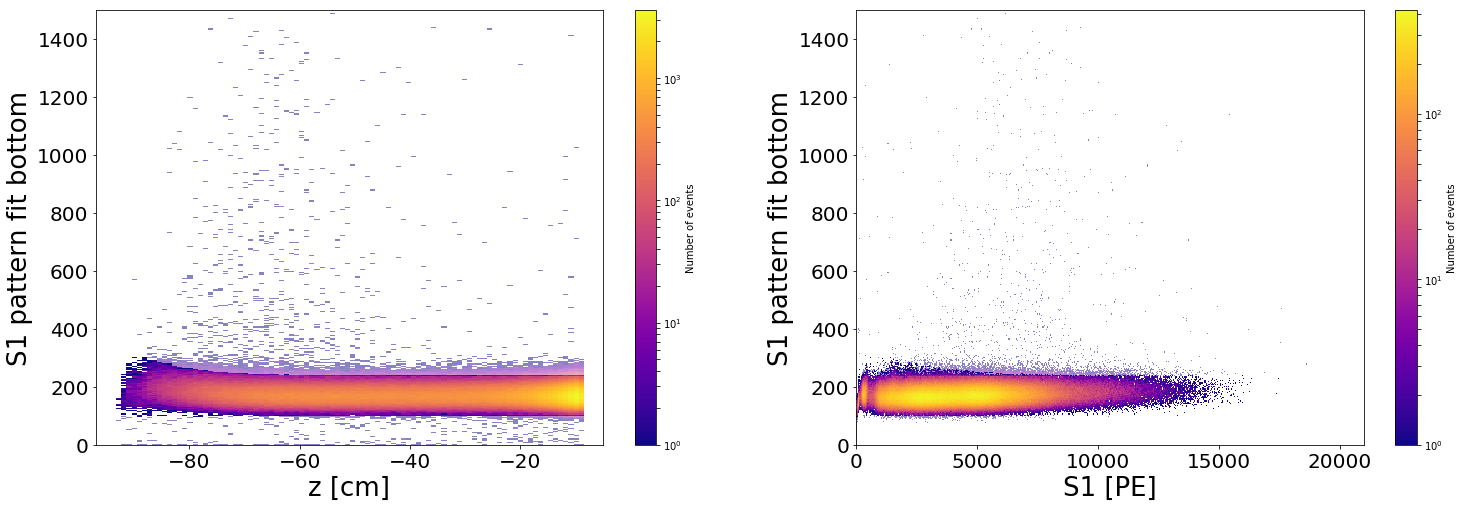

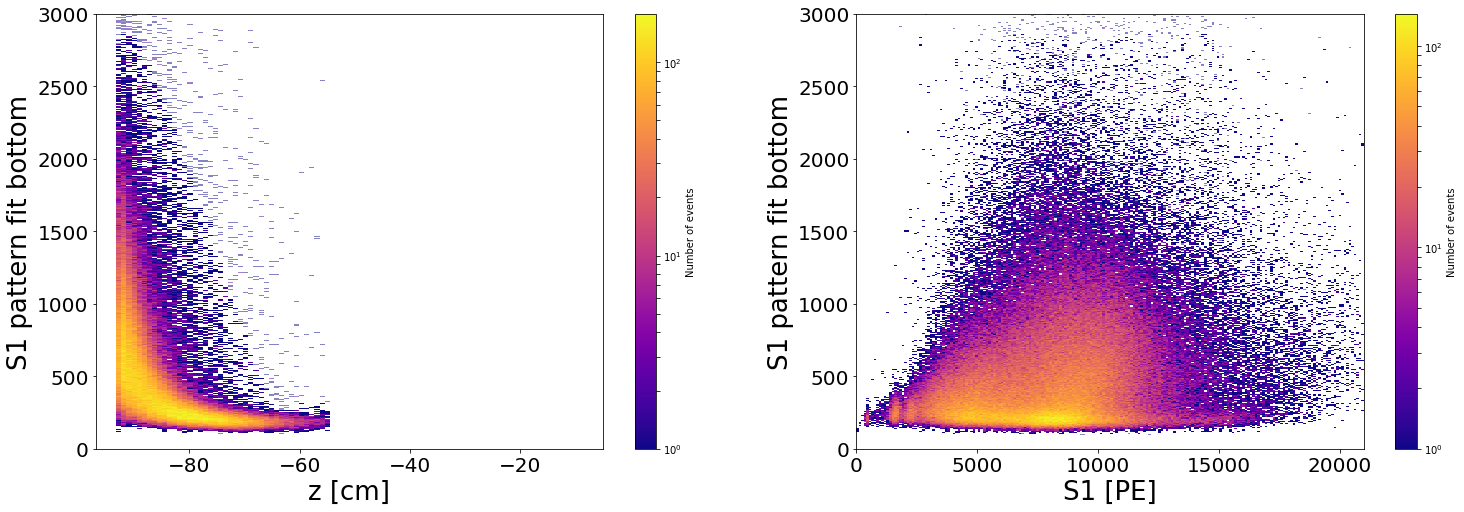

In [18]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD['z_3d_nn_tf'], data_fr_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (100, 1000),
           range = ((-97, -5), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD['z_3d_nn_tf'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], bins = (100, 1000),
           range = ((-97, -5), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_sr['s1'], data_sr['s1_pattern_fit_bottom_hax'], bins = (200, 400), 
           range=((0, 2.1e4), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD['s1'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], bins = (200, 400), 
           range=((0, 2.1e4), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

### Cut on S1
- first region
- second region

100%|██████████| 4/4 [00:00<00:00,  9.79it/s]


popt_1: 
 [ 4.05463507e+01  2.07882668e+01 -5.84895708e-01  3.33313977e-03] 

pcov_1: 
 [[ 1.79261865e+02 -3.91262099e+01  2.48856588e+00 -4.82270441e-02]
 [-3.91262099e+01  9.17593377e+00 -6.07949962e-01  1.20968884e-02]
 [ 2.48856588e+00 -6.07949962e-01  4.14276149e-02 -8.41190662e-04]
 [-4.82270441e-02  1.20968884e-02 -8.41190662e-04  1.73496012e-05]]
------ My function ------
######
Degrees of freedom
14
######
Chi2 value
79.92007723638487
######
Critical value
22.36203249482694
######
P value
1.142153038813376e-11

popt_2: 
 [2.35389331e+02 2.43058291e-03] 

pcov_2: 
 [[ 1.94626346e-01 -2.30301217e-05]
 [-2.30301217e-05  3.53015029e-09]]
------ My function ------
######
Degrees of freedom
102
######
Chi2 value
124.69319100438695
######
Critical value
125.45841940848236
######
P value
0.055006871596309126


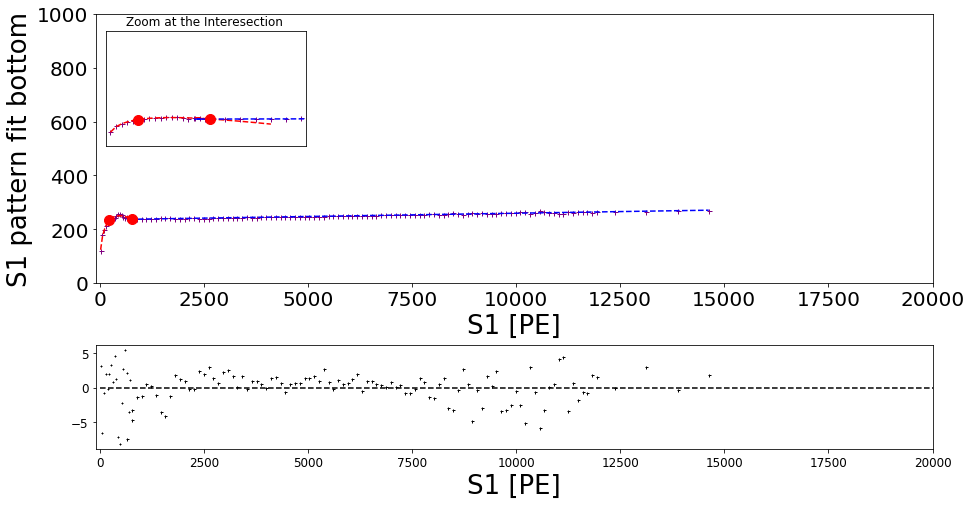

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


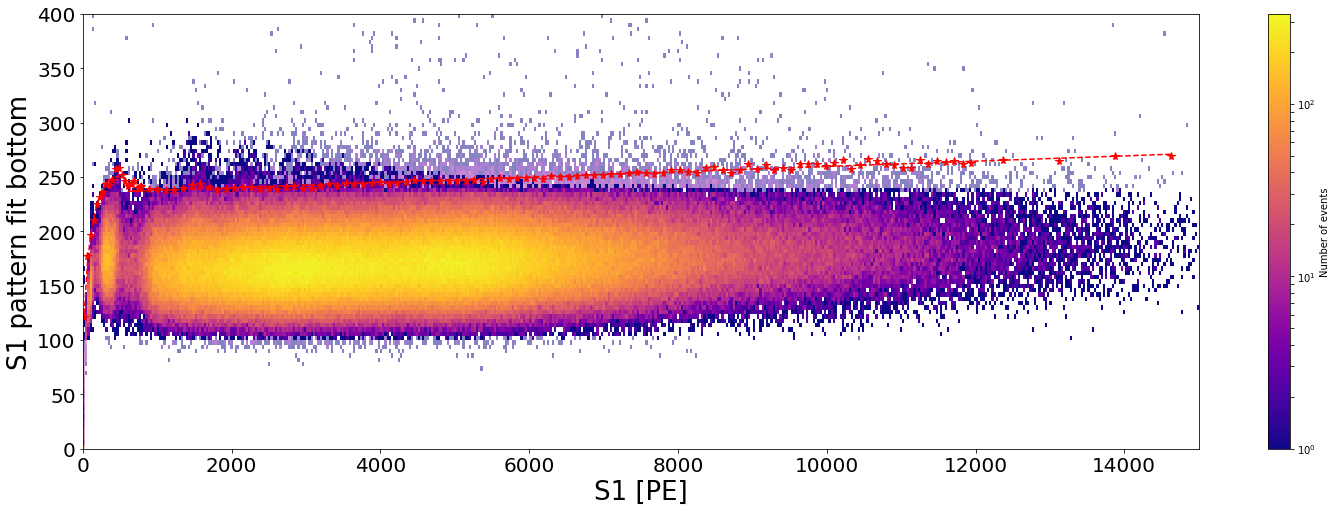

In [19]:
#######################################################
### Calcolo deigli input per il fit del cut su S1   ###     
### Abbiamo tre diversi intervalli, a bassi S1 per  ###
### modellare meglio lincremeno che si osserva, il  ###
### secondo a medi S1 in cui è pressocche piatta e  ###
### il trerso ad alti S1 in cui c'è poca statistica ###

x = np.linspace(0, 800, 20)
y = np.linspace(0, 400, 100)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'], 
                                          bins = (x,y))
ybins_center_1 = [0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)]
xbins_center_1 = [0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)]

perc_1 = np.empty(len(xbins_center_1))
for i in tqdm(range(len(hist_1))):
    perc_1[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
                           q=0.999, var1='s1', var2='s1 patter fit hax')
    
xbins_center_valid_1, perc_valid_1 = dropNaNforFit(xbins_center_1, perc_1)
xbins_center_valid_1, perc_valid_1 = dropNegforFit(xbins_center_valid_1, perc_valid_1)
#######################################################

#######################################################
x = np.linspace(600, 1.2e4, 100)
y = np.linspace(0, 400, 200)
hist_2, xbins_2, ybins_2 = np.histogram2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'],
                                          bins= (x,y))
ybins_center_2 = [0.5*(ybins_2[i]+ybins_2[i+1]) for i in range(len(ybins_2)-1)]
xbins_center_2 = [0.5*(xbins_2[i]+xbins_2[i+1]) for i in range(len(xbins_2)-1)]

perc_2 = np.empty(len(xbins_center_2))
for i in tqdm(range(len(hist_2))):
    perc_2[i] = percentile(index = i, hist=hist_2, ybins=ybins_2, xbins=xbins_2, 
                           q=0.999, var1='s1', var2='s1 patter fit bottom hax')
    
xbins_center_valid_2, perc_valid_2 = dropNaNforFit(xbins_center_2, perc_2)
xbins_center_valid_2, perc_valid_2 = dropNegforFit(xbins_center_valid_2, perc_valid_2)
#######################################################

#######################################################
x = np.linspace(1.2e4, 1.5e4, 5)
y = np.linspace(0, 400, 200)
hist_3, xbins_3, ybins_3 = np.histogram2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'],
                                          bins = (x, y))
ybins_center_3 = [0.5*(ybins_3[i]+ybins_3[i+1]) for i in range(len(ybins_3)-1)]
xbins_center_3 = [0.5*(xbins_3[i]+xbins_3[i+1]) for i in range(len(xbins_3)-1)]

perc_3 = np.empty(len(xbins_center_3))
for i in tqdm(range(len(hist_3))):
    perc_3[i] = percentile(index = i, hist=hist_3, ybins=ybins_3, xbins=xbins_3, 
                           q=0.999, var1='s1', var2='s1 patter fit bottom hax')
    
xbins_center_valid_3, perc_valid_3 = dropNaNforFit(xbins_center_3, perc_3)
xbins_center_valid_3, perc_valid_3 = dropNegforFit(xbins_center_valid_3, perc_valid_3)
#######################################################

xbins_center_valid = np.concatenate((xbins_center_valid_1, xbins_center_valid_2, xbins_center_valid_3))
perc_valid = np.concatenate((perc_valid_1, perc_valid_2, perc_valid_3))

#######################################################
### Qui fittiamo la funzione. Nel primo interavallo ###
### a bassi S1 viene utilizzata una funzione simile ###
### ad quella di SR1, nel resto viene utilizzata    ###
### una funzione empirica che meglio approssima la  ###
### distribuzione degli eventi                      ### 

#######################################################
init_1 = [1.37309245e+01,  2.52014490e+01, -1.00423678e+00,  1.31231589e-02]

popt_1, pcov_1 = curve_fit(S1PatternLikelihoodProfile_1, xbins_center_valid[:18], perc_valid[:18], p0=init_1)
print('popt_1: \n', popt_1 ,'\n\npcov_1: \n', pcov_1)
p_1 , chi2_1 = compute_chi2_p_2(perc_valid[:18], 
                                S1PatternLikelihoodProfile_1(perc_valid[:18], *popt_1), 
                                len(popt_1))
#######################################################

#######################################################
init_2 = [250, 0]

popt_2, pcov_2 = curve_fit(poly1, xbins_center_valid[18:], perc_valid[18:], p0=init_2)
print('\npopt_2: \n',popt_2, '\n\npcov_2: \n', pcov_2)
p_2 , chi2_2 = compute_chi2_p_2(perc_valid[18:], 
                                poly1(perc_valid[18:], *popt_2), 
                                len(popt_2))
#######################################################

#######################################################
idx = np.argwhere(np.diff(np.sign(S1PatternLikelihoodProfile_1(xbins_center_valid, *popt_1) - \
                                  poly1(xbins_center_valid, *popt_2)))).flatten()

#######################################################

plt.figure(figsize=(15,8))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

#######################################################
plt.subplot(grid[:2, :])

plt.plot(xbins_center_valid[:], perc_valid[:], '+', ms=5, c='purple')
plt.plot(xbins_center_valid[:20], S1PatternLikelihoodProfile_1(xbins_center_valid[:20], *popt_1), 'r--')
plt.plot(xbins_center_valid[18:], poly1(xbins_center_valid[18:], *popt_2), 'b--')
plt.plot(xbins_center_valid[idx], S1PatternLikelihoodProfile_1(xbins_center_valid[idx], *popt_1), 'ro' , ms=10)
plt.xlim(-100, 2e4)
plt.ylim(0,1000)
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.axes([0.135, 0.65, .185, .2], facecolor='w')
plt.plot(xbins_center_valid[:], perc_valid[:], '+', ms=5, c='purple')
plt.plot(xbins_center_valid[:25], S1PatternLikelihoodProfile_1(xbins_center_valid[:25], *popt_1), 'r--')
plt.plot(xbins_center_valid[18:], poly1(xbins_center_valid[18:], *popt_2), 'b--')
plt.plot(xbins_center_valid[idx], S1PatternLikelihoodProfile_1(xbins_center_valid[idx], *popt_1), 'ro' , ms=10)
plt.xlim(-10, 15e2)
plt.ylim(0,1000)
plt.xticks([])
plt.yticks([])
plt.title('Zoom at the Interesection ')
#plt.xlabel('s1 [PE]')
#plt.ylabel('s1_pattern_fit_hax')
#######################################################

#######################################################
plt.subplot(grid[2, :]);
plt.plot(xbins_center_valid[:18], S1PatternLikelihoodProfile_1(xbins_center_valid[:18], *popt_1)-perc_valid[:18], 
         'k+', ms=2)
plt.plot(xbins_center_valid[18:], poly1(xbins_center_valid[18:], *popt_2)-perc_valid[18:], 
         'k+', ms=3)
plt.hlines(y=0, xmin=0, xmax=2e4, linestyles='dashed')
plt.xlim(-100, 2e4)
plt.xlabel('S1 [PE]', fontsize=26)
plt.tick_params(labelsize=12)
#######################################################

plt.figure(figsize=(25,8))

x = xbins_center_valid
y = S1PatternLikelihoodProfile_1(x, *popt_1)*(x<600) + (poly1(x, *popt_2))*(x>=600)

plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (500, 100),
           range=((0, 1.5e4), (0, 400)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD['s1'], data_fr_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 100),
           range=((0, 1.5e4), (0, 400)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)

plt.colorbar(label='Number of events')
plt.plot(xbins_center_valid_1, perc_valid_1, 'r*', lw=2, ms=8)
plt.plot(xbins_center_valid_2, perc_valid_2, 'r*', lw=2, ms=8)
plt.plot(xbins_center_valid_3, perc_valid_3, 'r*', lw=2, ms=8)
plt.plot(x, y, 'r--', label = 'S1 Pattern Likelihood Cut')

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

In [20]:
#################################################
### Parametri per il taglio su S1 nella prima ###
### regione, con relative funzione associa    ###
print('Prima regione: ')
print('\nindex: ', xbins_center_valid[idx])
print('\npopt_S1 low:\n ', popt_1,'\n\npcov_z_low: \n', pcov_1)         # S1PatternLikelihoodProfile_1
print('\npopt_S1 high:\n ', popt_2 ,'\n\npcov_S1 high: \n', pcov_2)     # poly1 

Prima regione: 

index:  [231.57894737 772.72727273]

popt_S1 low:
  [ 4.05463507e+01  2.07882668e+01 -5.84895708e-01  3.33313977e-03] 

pcov_z_low: 
 [[ 1.79261865e+02 -3.91262099e+01  2.48856588e+00 -4.82270441e-02]
 [-3.91262099e+01  9.17593377e+00 -6.07949962e-01  1.20968884e-02]
 [ 2.48856588e+00 -6.07949962e-01  4.14276149e-02 -8.41190662e-04]
 [-4.82270441e-02  1.20968884e-02 -8.41190662e-04  1.73496012e-05]]

popt_S1 high:
  [2.35389331e+02 2.43058291e-03] 

pcov_S1 high: 
 [[ 1.94626346e-01 -2.30301217e-05]
 [-2.30301217e-05  3.53015029e-09]]


In [21]:
def CutS1PF_S1_fr(df):
    popt_S1_low_fr =  [4.05463507e+01,  2.07882668e+01, -5.84895708e-01,  3.33313977e-03]
    popt_S1_high_fr = [2.35389331e+02, 2.43058291e-03]
    S1_thr = 772
    
    cutline_S1_low_fr = (df['s1_pattern_fit_bottom_hax']<S1PatternLikelihoodProfile_1(df['s1'], *popt_S1_low_fr))&(df['s1']<S1_thr)
    cutline_S1_high_fr = (df['s1_pattern_fit_bottom_hax']<poly1(df['s1'], *popt_S1_high_fr))&(df['s1']>S1_thr)
    return (cutline_S1_low_fr)|(cutline_S1_high_fr)

data_fr_GOOD['CutS1PF_S1_fr'] = CutS1PF_S1_fr(data_fr_GOOD)
data_fr_GOOD_GOOD = hax.cuts.selection(data_fr_GOOD, data_fr_GOOD['CutS1PF_S1_fr'] == True)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unnamed selection: 1025 rows removed (99.87% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


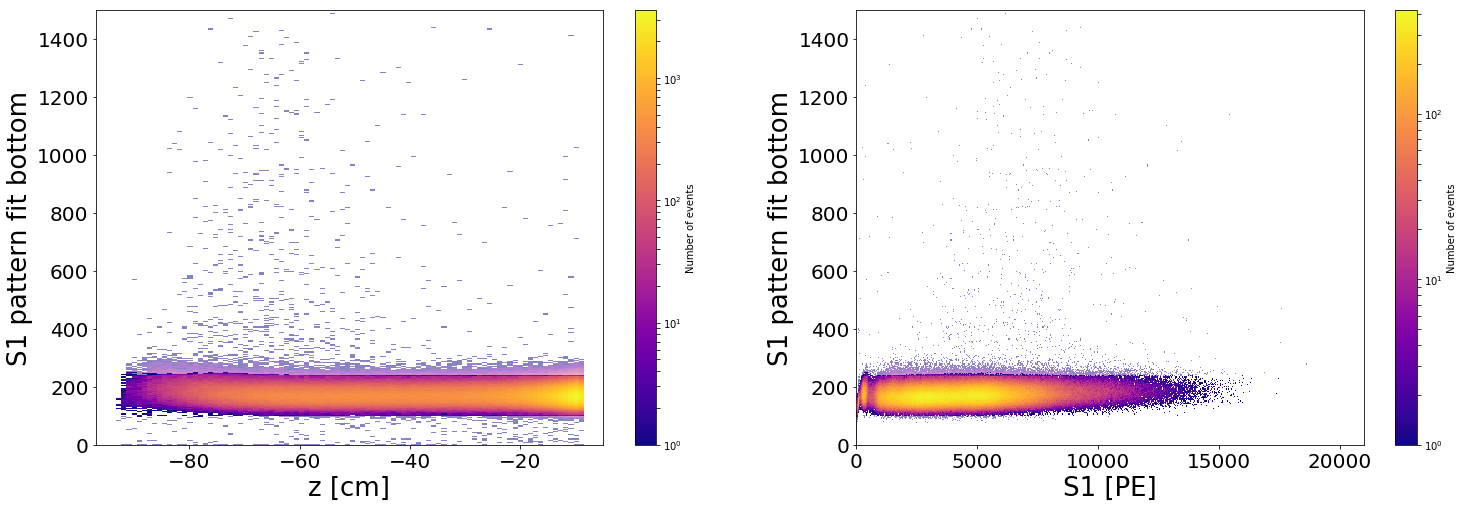

In [22]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_fr['z_3d_nn_tf'], data_fr['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD_GOOD['z_3d_nn_tf'], data_fr_GOOD_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_fr['s1'], data_fr['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_fr_GOOD_GOOD['s1'], data_fr_GOOD_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 1.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

100%|██████████| 49/49 [00:00<00:00, 4781.22it/s]
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


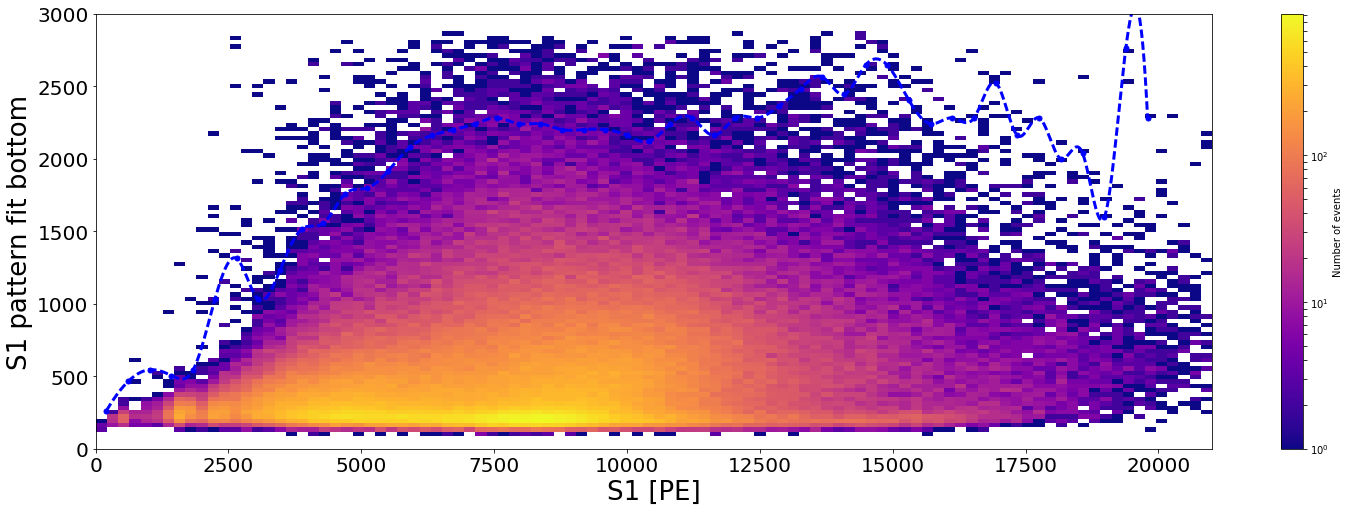

In [23]:
#######################################################
### Calcolo deigli input per il fit del cut su S1   ###     
### Abbiamo tre diversi intervalli, a bassi S1 per  ###
### modellare meglio lincremeno che si osserva, il  ###
### secondo a medi S1 in cui è pressocche piatta e  ###
### il trerso ad alti S1 in cui c'è poca statistica ###

x = np.linspace(0, 2e4, 50)
y = np.linspace(0, 4e3, 100)

hist_1, xbins_1, ybins_1 = np.histogram2d(data_sr_GOOD['s1'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], 
                                          bins = (x,y))
ybins_center_1 = [0.5*(ybins_1[i]+ybins_1[i+1]) for i in range(len(ybins_1)-1)]
xbins_center_1 = [0.5*(xbins_1[i]+xbins_1[i+1]) for i in range(len(xbins_1)-1)]

#perc_1 = np.empty(len(xbins_center_1))
#for i in tqdm(range(len(hist_1))):
#    perc_1[i] = percentile(index = i, hist=hist_1, ybins=ybins_1, xbins=xbins_1, 
#                           q=0.9999, var1='s1', var2='s1 patter fit hax')

#xbins_center_valid_1, perc_valid_1 = dropNaNforFit(xbins_center_1, perc_1)
#xbins_center_valid_1, perc_valid_1 = dropNegforFit(xbins_center_valid_1, perc_valid_1)

perc_1_num = percentile_numeric(hist=hist_1, ybins=ybins_1, xbins=xbins_1, q=0.995)
################################################################
### Non si reisce a fittare quindi qui interpoloiamo con una ### 
### spline (= tanti polinomi) con uno smoothing uguale a 3   ###

spl_s1 = interpolate.InterpolatedUnivariateSpline(xbins_center_1, perc_1_num, k = 3)
xx = np.linspace(min(xbins_center_1),max(xbins_center_1), 10000)

#Save, load and plot again (NOTE CAUSES ERROR)
with open('./cut_line/interpolator_s1.pkl', 'wb') as f:
    pickle.dump(spl_s1, f)
#Pickle, unpickle and then plot again
#with open('interpolator.pkl', 'wb') as f:
#    pickle.dump(spl, f)
#with open('interpolator.pkl', 'rb') as f:
#    spl_loaded = pickle.load(f)
#plt.plot(xx, spl_loaded(xx), 'k--', lw=3, alpha=0.7)

plt.figure(figsize=(25,8))

plt.hist2d(data_sr_GOOD['s1'], data_sr_GOOD['s1_pattern_fit_bottom_hax'], bins = (100, 100), 
           range=((0, 2.1e4), (0, 3e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')

plt.plot(xbins_center_1, perc_1_num, 'bo', ms=5)
plt.plot(xx, spl_s1(xx), 'b--', lw=3)

plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.show()

In [24]:
def CutS1PF_S1_sr(df):
    with open('./cut_line/interpolator_s1.pkl', 'rb') as f:
        spl_S1_sr = pickle.load(f)
    
    cutline_S1_sr = df['s1_pattern_fit_bottom_hax']<spl_S1_sr(df['s1'])
    return cutline_S1_sr

data_sr_GOOD['CutS1PF_S1_sr'] = CutS1PF_S1_sr(data_sr_GOOD)
data_sr_GOOD_GOOD = hax.cuts.selection(data_sr_GOOD, data_sr_GOOD['CutS1PF_S1_sr'] == True)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unnamed selection: 1731 rows removed (99.39% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


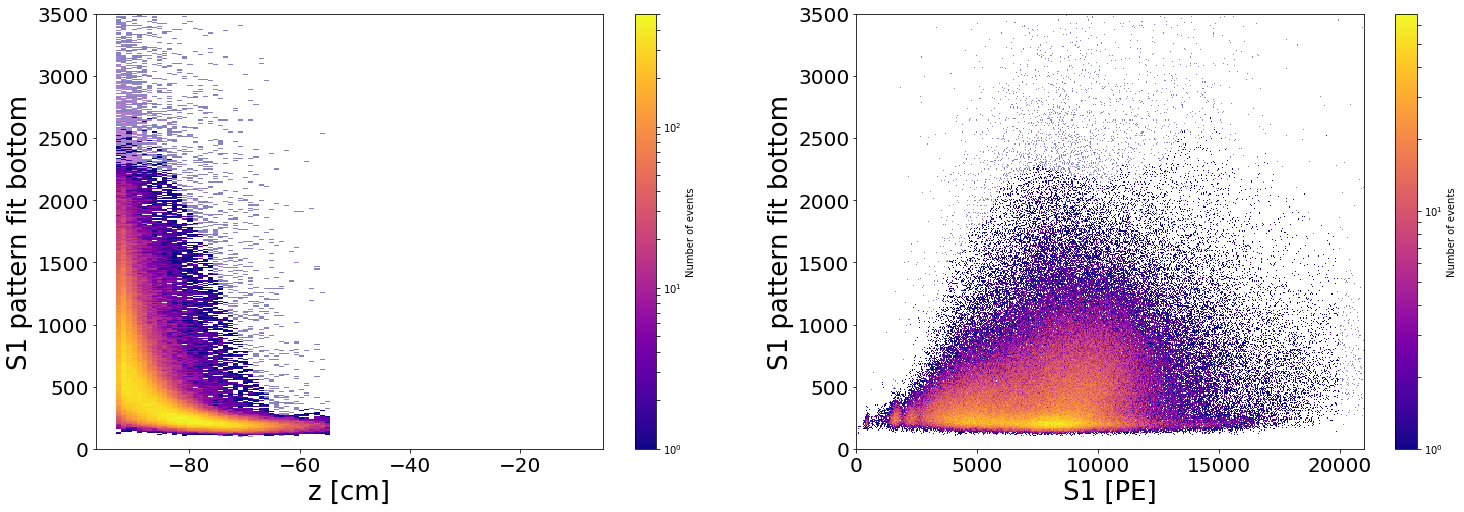

In [25]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data_sr['z_3d_nn_tf'], data_sr['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD_GOOD['z_3d_nn_tf'], data_sr_GOOD_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data_sr['s1'], data_sr['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_sr_GOOD_GOOD['s1'], data_sr_GOOD_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


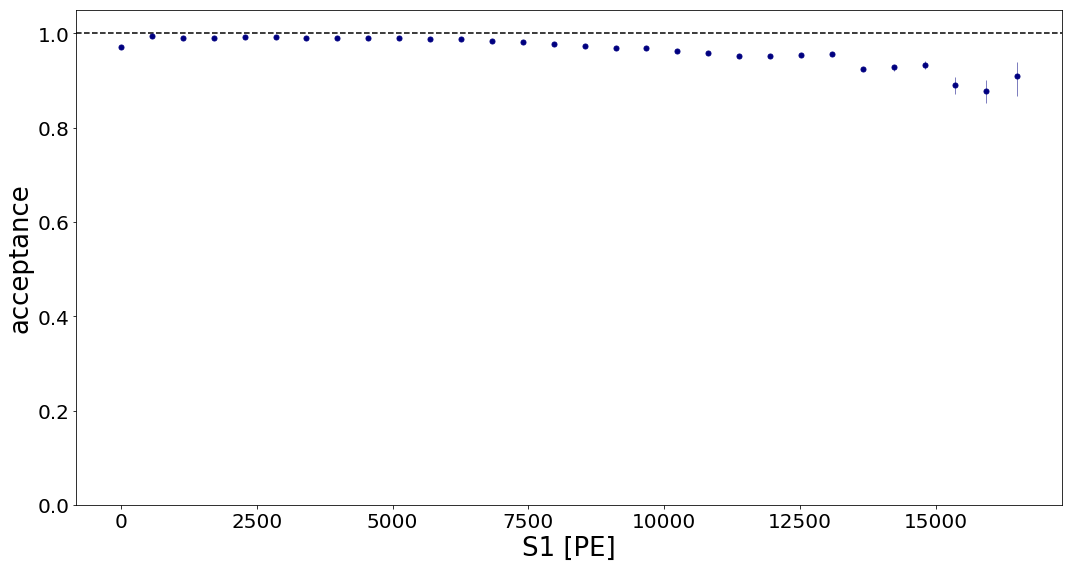

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:68: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:111: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1 + crit2 / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:112: RuntimeWarning: divide by zero encountered in true_divide
  center = (q_ + crit2 / (2 * nobs)) / denom
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:113: RuntimeWarning:

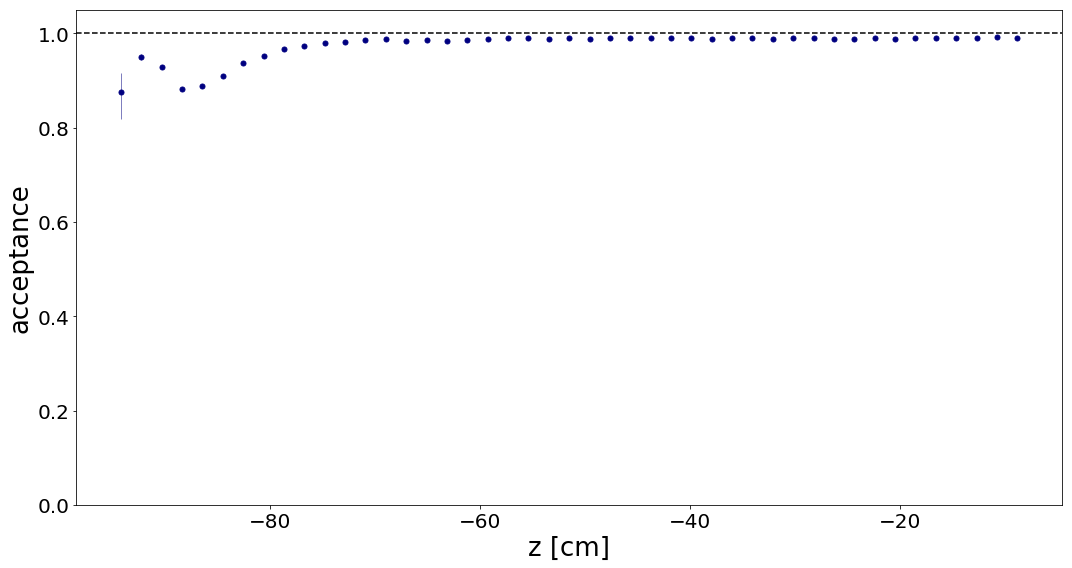

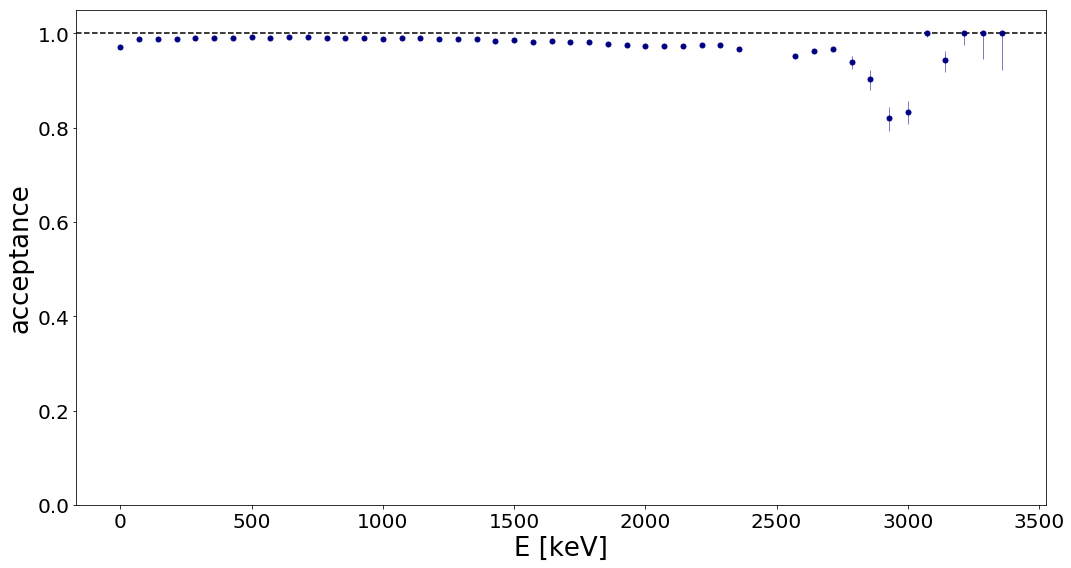

In [26]:
##############################################
### Vediamo com'è l'accettanza in funzione ###
### di S1, z e E per la prima regione    ###

Bins=30
hist_range=([0, 1.65e4])  
binn=np.linspace(0, 1.65e4,Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data_fr.s1, data_fr_GOOD_GOOD.s1)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.9,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

Bins=50
hist_range=([-100, -5])  
binn=np.linspace(-100, -5, Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data_fr.z_3d_nn_tf, data_fr_GOOD_GOOD.z_3d_nn_tf)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('z [cm]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.9,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

Bins=50
hist_range=([0, 3.5e3])  
binn=np.linspace(0, 3.5e3, Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data_fr.CES/10**3, data_fr_GOOD_GOOD.CES/10**3)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('E [keV]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.85,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


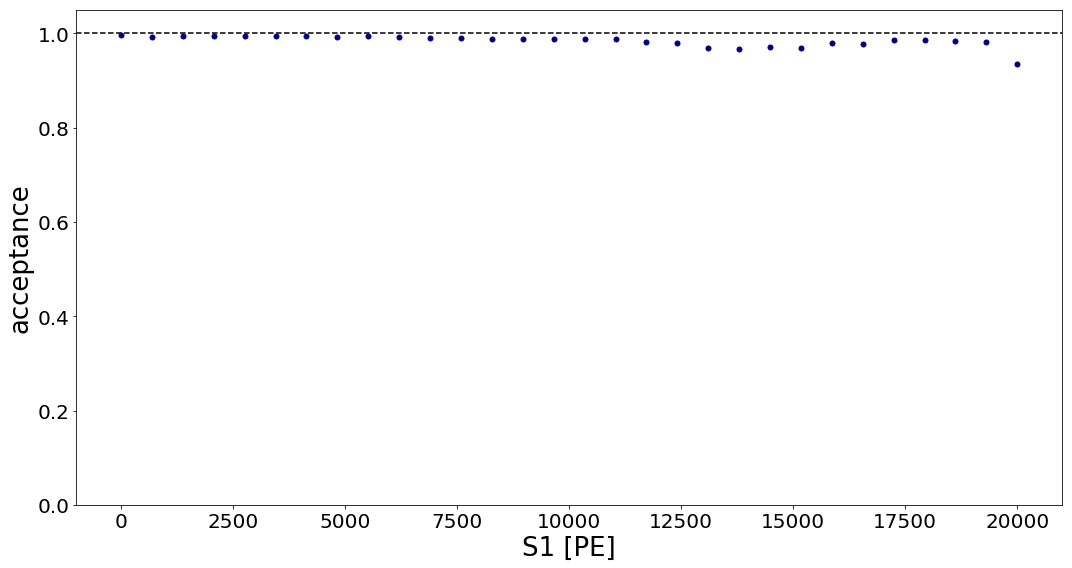

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:68: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:111: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1 + crit2 / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:112: RuntimeWarning: divide by zero encountered in true_divide
  center = (q_ + crit2 / (2 * nobs)) / denom
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:113: RuntimeWarning:

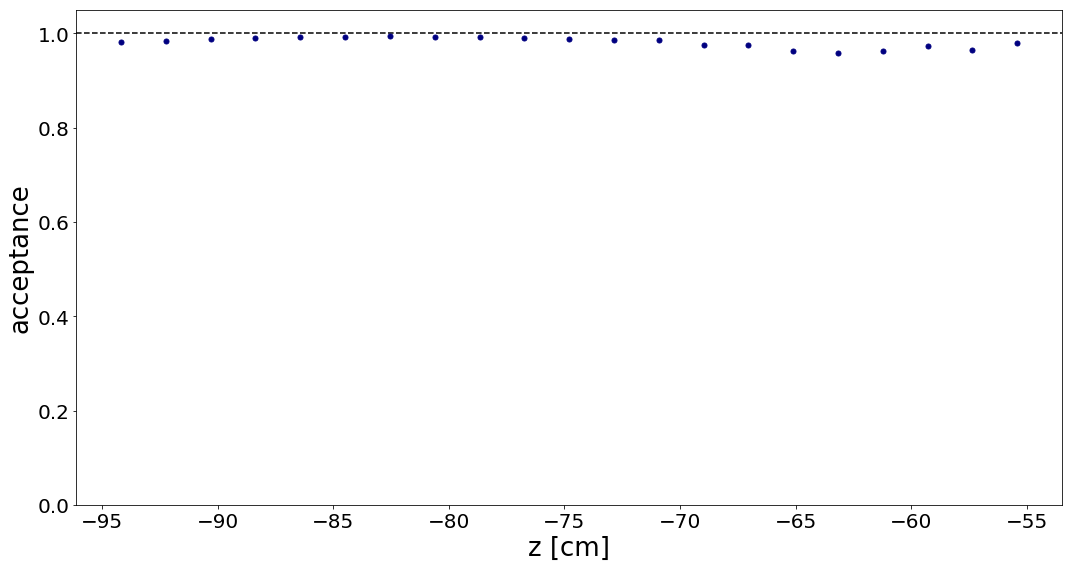

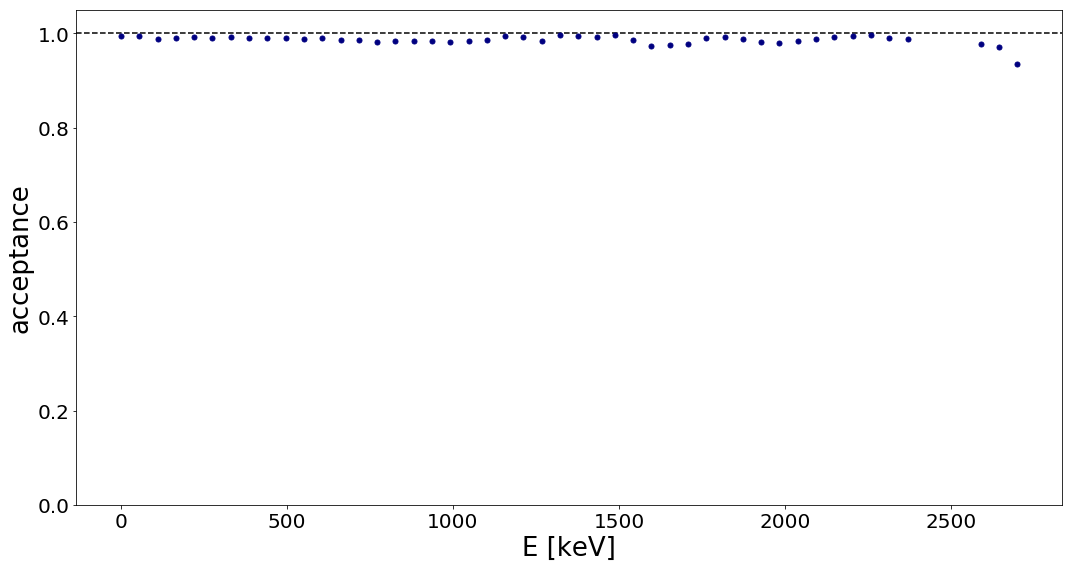

In [27]:
##############################################
### Vediamo com'è l'accettanza in funzione ###
### di S1, z e E per la seconda regione    ###

Bins=30
hist_range=([0, 2e4])  
binn=np.linspace(0,2e4,Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data_sr.s1, data_sr_GOOD_GOOD.s1)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.9,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

Bins=50
hist_range=([-100, -5])  
binn=np.linspace(-100, -5, Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data_sr.z_3d_nn_tf, data_sr_GOOD_GOOD.z_3d_nn_tf)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('z [cm]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.9,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

Bins=50
hist_range=([0, 2.7e3])  
binn=np.linspace(0, 2.7e3, Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data_sr.CES/10**3, data_sr_GOOD_GOOD.CES/10**3)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('E [keV]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.85,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

### S1 Pattern Likelihood cut for HE

In [28]:
def CutS1_PL_HE(df):
    
    ################################################
    ### Carico la funzione interpolata per il    ###
    ### taglio di S1 ez nella seconda regione    ###
    
    with open('./cut_line/interpolator_s1.pkl', 'rb') as f:
        spl_S1_sr = pickle.load(f)

    with open('./cut_line/interpolator_z.pkl', 'rb') as f:
        spl_z_sr = pickle.load(f)
    
    ########################################
    ### Parametri della retta che separa ###
    ### le due regioni considerate       ###
    
    x_1 = 1.2e4
    m_1 = (93. - 55.)/(0. - 12000.)
    q_1 = 93.
    q_2 = 55.
    first_line_down  = (df['s1']<=x_1)&(-df['z_3d_nn_tf']<(df['s1']*m_1+q_1))
    second_line_down = (df['s1']>x_1)&(-df['z_3d_nn_tf']<q_2)
    first_line_up    = (df['s1']<=x_1)&(-df['z_3d_nn_tf']>(df['s1']*m_1+q_1))
    second_line_up   = (df['s1']>x_1)&(-df['z_3d_nn_tf']>q_2)
    
    #####################################
    ### Parametri per le funzione dei ###
    ### tagli nella prima regione     ###
    
    popt_z_high_fr = [2.36985250e+02, 1.80524357e-03, 1.19723275e-01]  
    popt_z_low_fr =  [1.03477720e+02, 3.53078631e-02]
    popt_S1_low_fr =  [4.05463507e+01,  2.07882668e+01, -5.84895708e-01,  3.33313977e-03]
    popt_S1_high_fr = [2.35389331e+02, 2.43058291e-03]
    S1_thr = 772
    
    ################################
    ### Condizioni da soddisfare ### 
    ### nella prima regione      ###
    
    cl_region_fr = first_line_down|second_line_down
    cl_z_high_fr = df['s1_pattern_fit_bottom_hax'] < exp(df['z_3d_nn_tf'], *popt_z_high_fr)
    cl_z_low_fr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_fr)
    cl_S1_low_fr = (df['s1_pattern_fit_bottom_hax']<S1PatternLikelihoodProfile_1(df['s1'], *popt_S1_low_fr))&(df['s1']<S1_thr)
    cl_S1_high_fr = (df['s1_pattern_fit_bottom_hax']<poly1(df['s1'], *popt_S1_high_fr))&(df['s1']>S1_thr)
    
    cl_fr = cl_region_fr&(cl_z_high_fr&cl_z_low_fr)&(cl_S1_low_fr|cl_S1_high_fr)
    
    #####################################
    ### Parametri per le funzione dei ###
    ### tagli nella seconda regione   ###
    
    popt_z_low_sr =  [1.10549131e+02, 3.64364369e-02]
    
    ################################
    ### Condizioni da soddisfare ### 
    ### nella seconda regione    ###
    
    cl_region_sr = first_line_up|second_line_up
    cl_z_high_sr = df['s1_pattern_fit_bottom_hax']< spl_z_sr(df['z_3d_nn_tf'])
    cl_z_low_sr = df['s1_pattern_fit_bottom_hax'] > poly1(df['z_3d_nn_tf'], *popt_z_low_sr)
    cl_S1_sr = df['s1_pattern_fit_bottom_hax']<spl_S1_sr(df['s1'])
    
    cl_sr = cl_region_sr&(cl_z_high_sr&cl_z_low_sr)&(cl_S1_sr)
    
    ####################################
    ### S1 pattern likelihood for HE ###
    
    return cl_fr|cl_sr

In [29]:
data['CutS1PL_HE'] = CutS1_PL_HE(data)

In [30]:
data_GOOD = hax.cuts.selection(data, data['CutS1PL_HE'] == True)
data_BAD = hax.cuts.selection(data, data['CutS1PL_HE'] == False)

Unnamed selection: 13007 rows removed (98.82% passed)
Unnamed selection: 1090364 rows removed (1.18% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


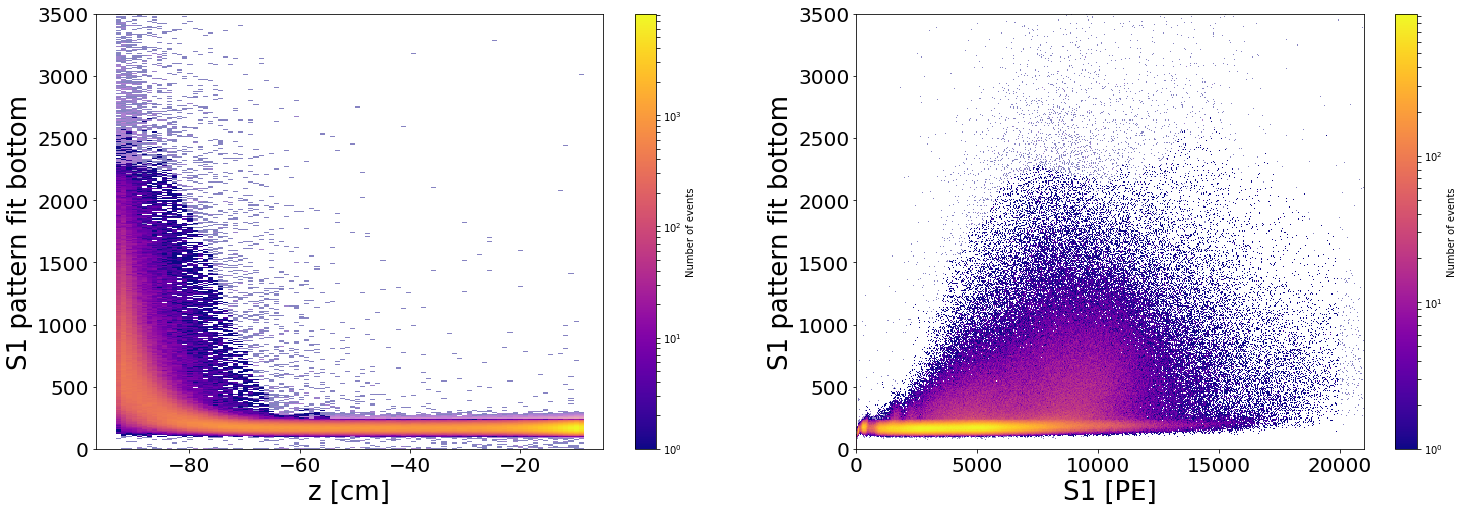

In [31]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.hist2d(data['z_3d_nn_tf'], data['s1_pattern_fit_bottom_hax'], bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['z_3d_nn_tf'], data_GOOD['s1_pattern_fit_bottom_hax'],bins = (100, 400),
           range = ((-97, -5), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

plt.subplot(122)
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['s1'], data_GOOD['s1_pattern_fit_bottom_hax'], bins = (500, 400), 
           range=((0, 2.1e4), (0, 3.5e3)), cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


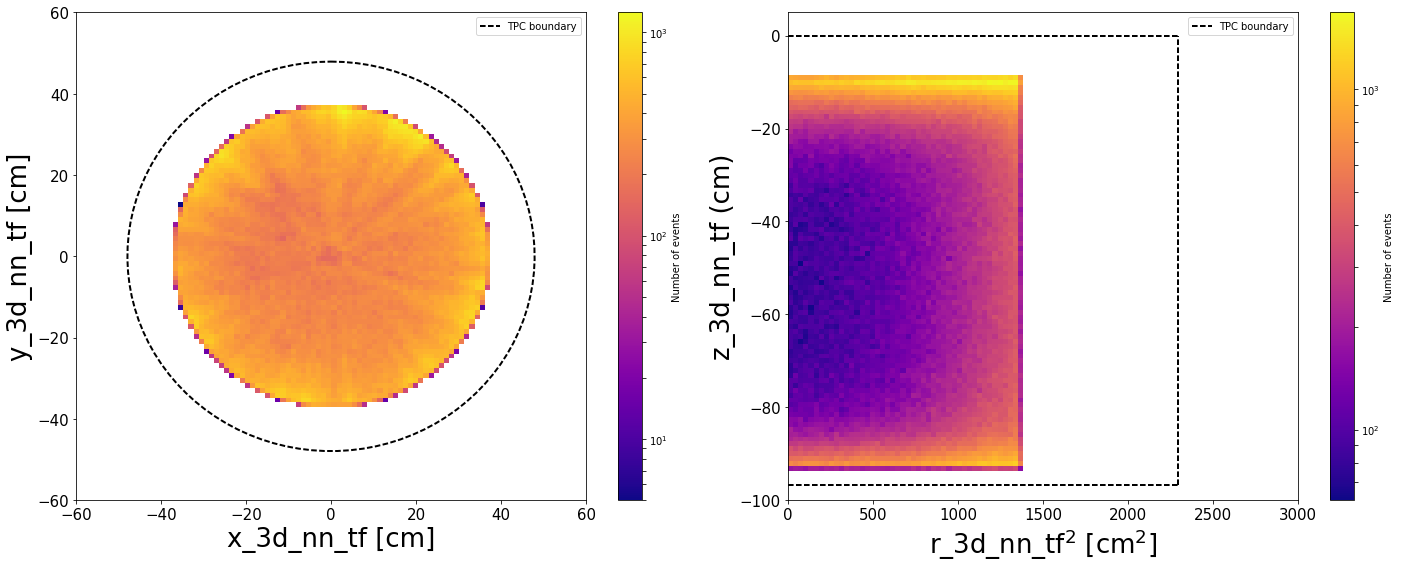

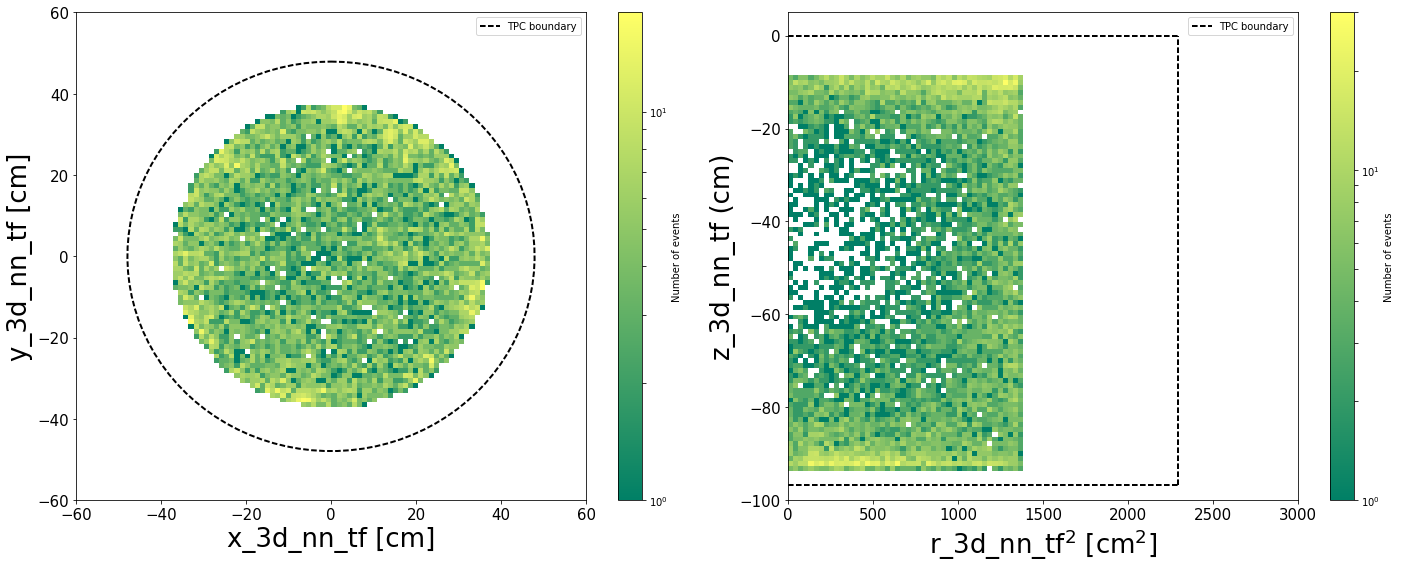

In [32]:
fig = plt.figure(figsize=(20, 8))

################################################
plt.subplot(121)
#plt.hist2d(data['x_3d_nn_tf'], data['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 0.5)
plt.hist2d(data_GOOD['x_3d_nn_tf'], data_GOOD['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 1)
plt_circle(linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
#plt.xlim((-60,60))
#plt.ylim((-60,60))
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)
################################################

################################################
plt.subplot(122)
#plt.hist2d((data['r_3d_nn_tf']**2), data['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d((data_GOOD['r_3d_nn_tf']**2), data_GOOD['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.tight_layout()
plt.show()

################################################

fig = plt.figure(figsize=(20, 8))

################################################
plt.subplot(121)
#plt.hist2d(data['x_3d_nn_tf'], data['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 0.5)
plt.hist2d(data_BAD['x_3d_nn_tf'], data_BAD['y_3d_nn_tf'], bins=(100,100), range=((-60,60), (-60,60)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(),cmin = 1,alpha = 1)
plt_circle(linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
#plt.xlim((-60,60))
#plt.ylim((-60,60))
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)
################################################

################################################
plt.subplot(122)
#plt.hist2d((data['r_3d_nn_tf']**2), data['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
#           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 0.5)
plt.hist2d((data_BAD['r_3d_nn_tf']**2), data_BAD['z_3d_nn_tf'], bins=(100,100), range=((0,3000), (-100,5)), 
           cmap=plt.cm.summer, norm=matplotlib.colors.LogNorm(), cmin = 1,alpha = 1)
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.colorbar(label='Number of events')
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)
################################################

plt.tight_layout()
plt.show()

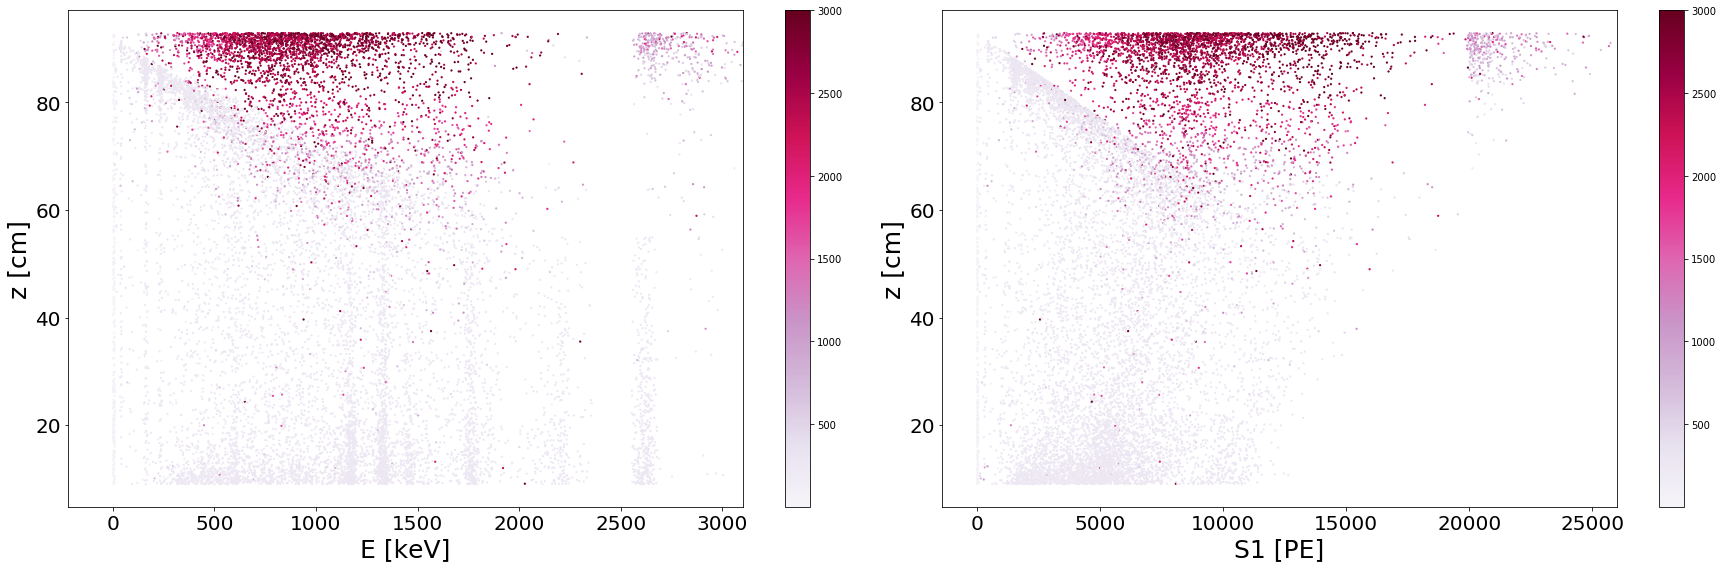

In [33]:
fig = plt.figure(figsize=(25,8))

plt.subplot(121)
points_1 = plt.scatter(data_BAD['CES']/10**3, -data_BAD['z_3d_nn_tf'], 
                       c = data_BAD['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_1)
plt.xlim(right=3100)
plt.xlabel('E [keV]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.subplot(122)
points_2 = plt.scatter(data_BAD['s1'], -data_BAD['z_3d_nn_tf'], 
                       c = data_BAD['s1_pattern_fit_bottom_hax'], s = 5,
                       cmap="PuRd", lw=0, vmax=3e3)
plt.colorbar(points_2)
#plt.plot(x, y, 'k--')
plt.xlim(right=26000)
plt.xlabel('S1 [PE]', fontsize=25)
plt.ylabel('z [cm]', fontsize=25)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

### Acceptance

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


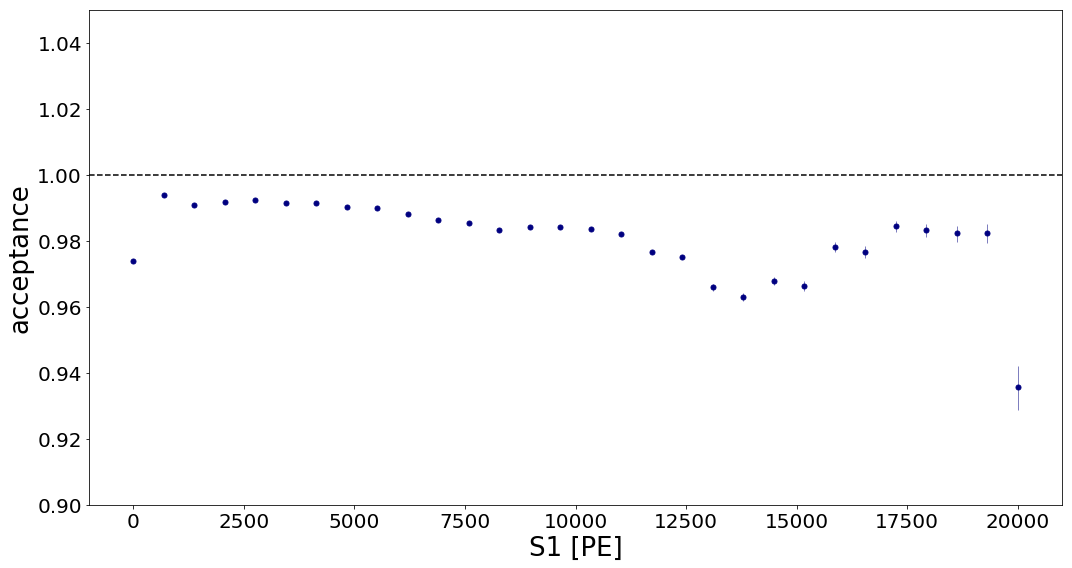

In [34]:
Bins=30
hist_range=([0, 2e4])  
binn=np.linspace(0,2e4,Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data.s1, data_GOOD.s1)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
plt.legend(loc='best')
plt.ylim(0.9,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:68: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:111: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1 + crit2 / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:112: RuntimeWarning: divide by zero encountered in true_divide
  center = (q_ + crit2 / (2 * nobs)) / denom
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:113: RuntimeWarning:

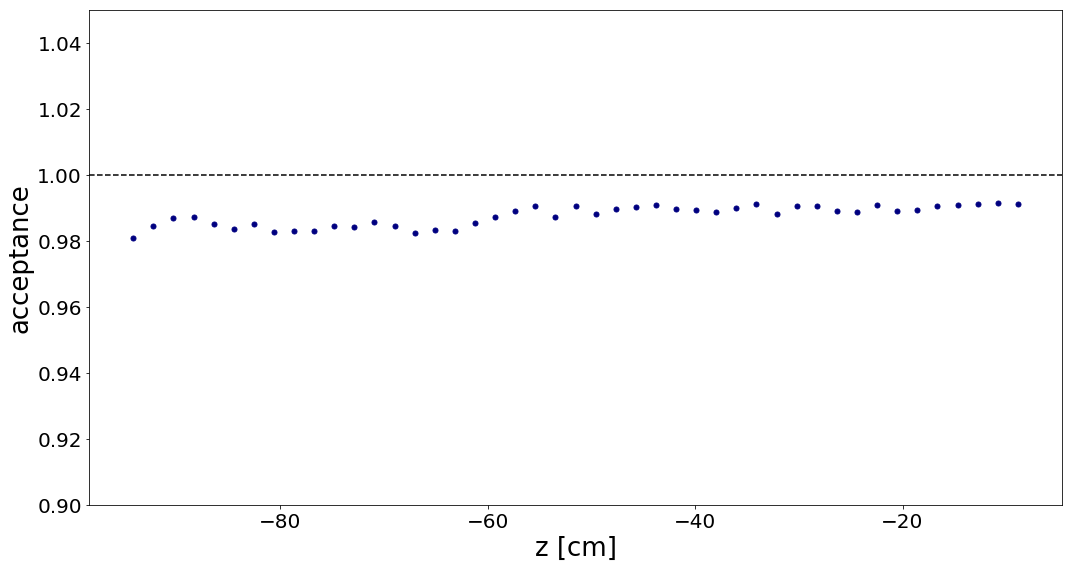

In [35]:
Bins=50
hist_range=([-100, -5])  
binn=np.linspace(-100, -5, Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data.z_3d_nn_tf, data_GOOD.z_3d_nn_tf)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('z [cm]', fontsize=26)
plt.legend(loc='best')
plt.ylim(0.9,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:68: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:111: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1 + crit2 / nobs
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:112: RuntimeWarning: divide by zero encountered in true_divide
  center = (q_ + crit2 / (2 * nobs)) / denom
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:113: RuntimeWarning:

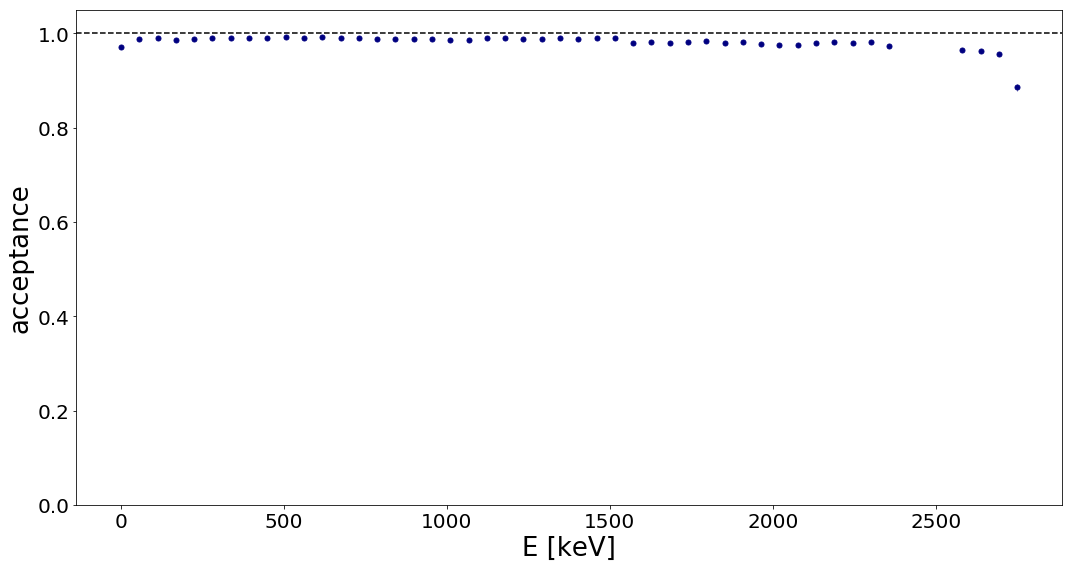

In [36]:
Bins=50
hist_range=([0, 2.75e3])  
binn=np.linspace(0, 2.75e3, Bins)

fig = plt.figure(figsize=(15, 8))
acceptance(data.CES/10**3, data_GOOD.CES/10**3)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('E [keV]', fontsize=26)
plt.legend(loc='best')
#plt.ylim(0.85,1.05)
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.show()

## Foto picchi

In [37]:
energy_peak = np.array([42, 164, 236, 609, 1120, 1173, 1332, 1461, 1764, 2204, 2614]) #keV
resolution = np.array([0.0516, 0.0260, 0.0223, 0.0137, 0.0117, 0.0109, 0.0103, 0.0091, 0.0092, 0.0081, 0.0081])
sigma_peak = energy_peak*resolution
energy_peak_lower = energy_peak-2*sigma_peak
energy_peak_higher = energy_peak+2*sigma_peak

In [38]:
#83 Kr
gamma42 = data[(data['CES']/10**3<=energy_peak_higher[0])&(data['CES']/10**3>=energy_peak_lower[0])]
cut_gamma42 = (data['CES']/10**3<=energy_peak_higher[0])&(data['CES']/10**3>=energy_peak_lower[0])
#60 Co
gamma1332 = data[(data['CES']/10**3<=energy_peak_higher[6])&(data['CES']/10**3>=energy_peak_lower[6])]
cut_gamma1332 = (data['CES']/10**3<=energy_peak_higher[6])&(data['CES']/10**3>=energy_peak_lower[6])
#214 Bi 
gamma2204 = data[(data['CES']/10**3<=energy_peak_higher[9])&(data['CES']/10**3>=energy_peak_lower[9])]
cut_gamma2204 = (data['CES']/10**3<=energy_peak_higher[9])&(data['CES']/10**3>=energy_peak_lower[9])
#208 Tl 
gamma2614 = data[(data['CES']/10**3<=energy_peak_higher[10])&(data['CES']/10**3>=energy_peak_lower[10])]
cut_gamma2614 = (data['CES']/10**3<=energy_peak_higher[10])&(data['CES']/10**3>=energy_peak_lower[10])

In [39]:
gamma42['CutS1PatternLikelihood_HE'] = CutS1_PL_HE(gamma42)
gamma1332['CutS1PatternLikelihood_HE'] = CutS1_PL_HE(gamma1332)
gamma2204['CutS1PatternLikelihood_HE'] = CutS1_PL_HE(gamma2204)
gamma2614['CutS1PatternLikelihood_HE'] = CutS1_PL_HE(gamma2614)

print('\nGamma42: ')
gamma42_GOOD = hax.cuts.selection(gamma42, gamma42['CutS1PatternLikelihood_HE'] == True)
gamma42_BAD = hax.cuts.selection(gamma42, gamma42['CutS1PatternLikelihood_HE'] == False)
print('\nGamma1332: ')
gamma1332_GOOD = hax.cuts.selection(gamma1332, gamma1332['CutS1PatternLikelihood_HE'] == True)
gamma1332_BAD = hax.cuts.selection(gamma1332, gamma1332['CutS1PatternLikelihood_HE'] == False)
print('\nGamma2204: ')
gamma2204_GOOD = hax.cuts.selection(gamma2204, gamma2204['CutS1PatternLikelihood_HE'] == True)
gamma2204_BAD = hax.cuts.selection(gamma2204, gamma2204['CutS1PatternLikelihood_HE'] == False)
print('\nGamma2614: ')
gamma2614_GOOD = hax.cuts.selection(gamma2614, gamma2614['CutS1PatternLikelihood_HE'] == True)
gamma2614_BAD = hax.cuts.selection(gamma2614, gamma2614['CutS1PatternLikelihood_HE'] == False)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning


Gamma42: 
Unnamed selection: 68 rows removed (99.32% passed)
Unnamed selection: 9979 rows removed (0.68% passed)

Gamma1332: 
Unnamed selection: 781 rows removed (99.06% passed)
Unnamed selection: 82229 rows removed (0.94% passed)

Gamma2204: 
Unnamed selection: 150 rows removed (98.04% passed)
Unnamed selection: 7490 rows removed (1.96% passed)

Gamma2614: 
Unnamed selection: 457 rows removed (96.38% passed)
Unnamed selection: 12182 rows removed (3.62% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


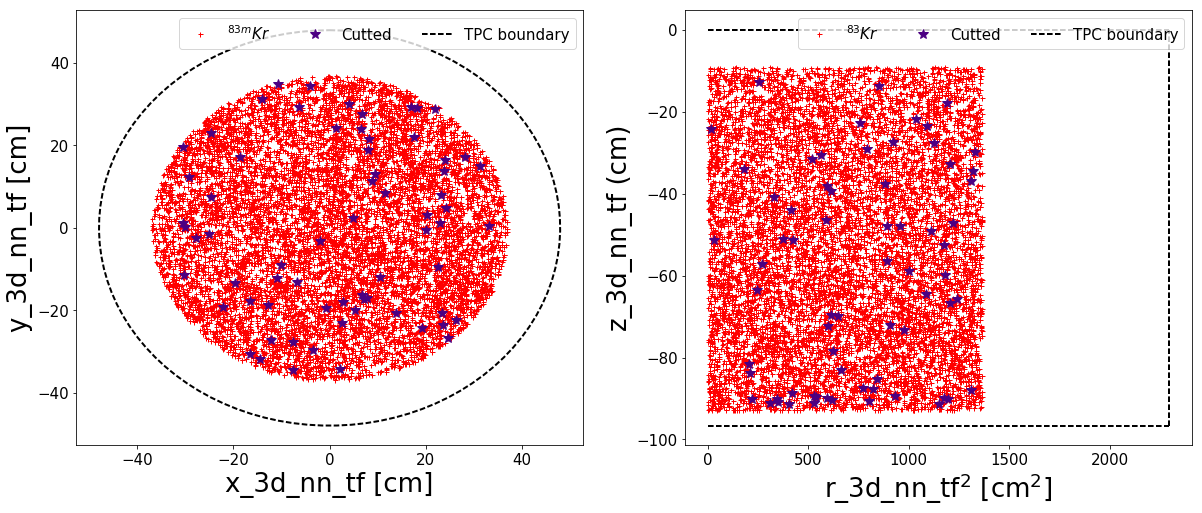

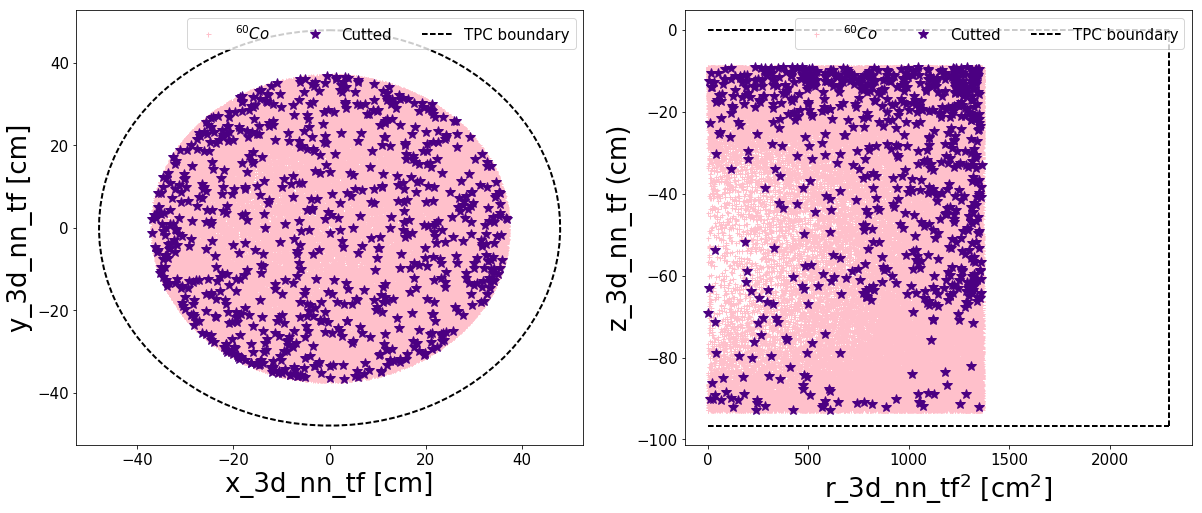

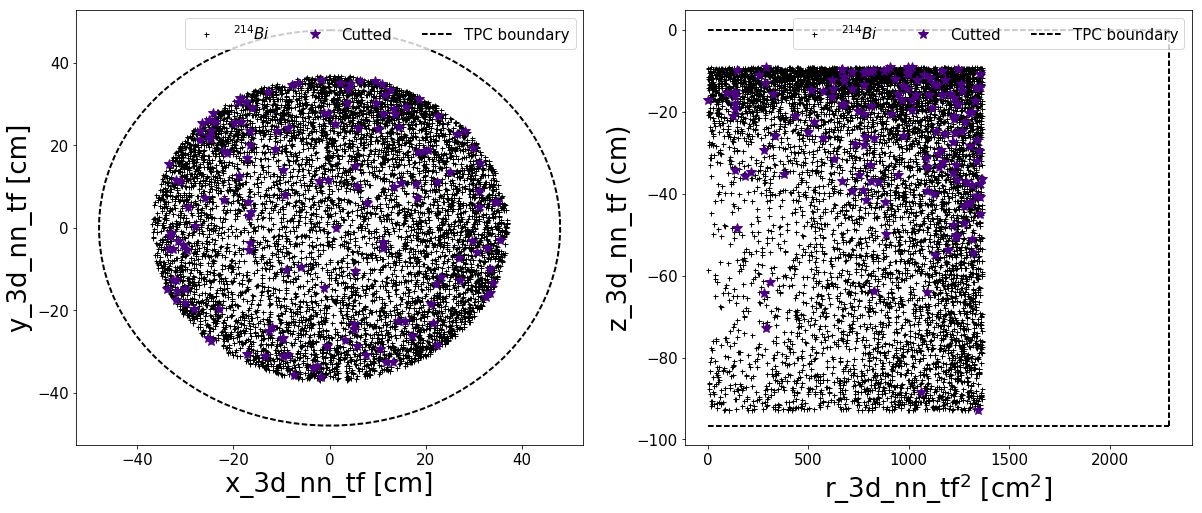

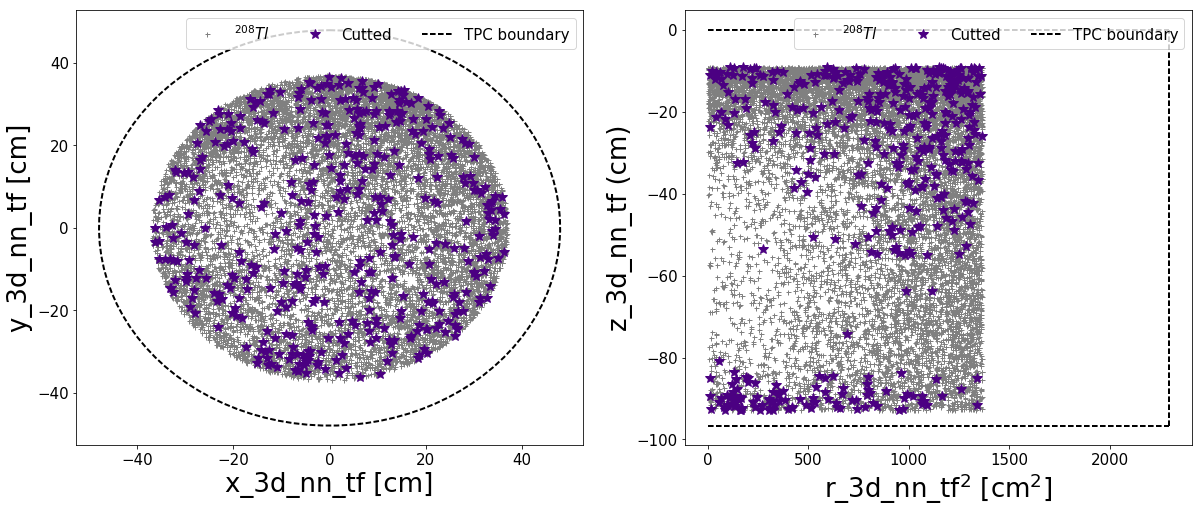

In [40]:
################################
#### 83m Kr - Gamma a 42 keV ###
fig = plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(gamma42['x_3d_nn_tf'], gamma42['y_3d_nn_tf'], marker='+', markersize=5, linestyle=' ', 
         color='red', label='$^{83m}Kr$')
plt.plot(gamma42_BAD['x_3d_nn_tf'], gamma42_BAD['y_3d_nn_tf'],marker='*', markersize=10, linestyle=' ', 
         color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

plt.subplot(122)
plt.plot(gamma42['r_3d_nn_tf']**2, gamma42['z_3d_nn_tf'], marker='+', markersize=5, linestyle=' ', 
         color='red', label='$^{83}Kr$')
plt.plot(gamma42_BAD['r_3d_nn_tf']**2, gamma42_BAD['z_3d_nn_tf'], marker='*', markersize=10, linestyle=' ',
         color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)

plt.show()
################################

#################################
#### 60 Co - Gamma a 1332 keV ###
fig = plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(gamma1332['x_3d_nn_tf'], gamma1332['y_3d_nn_tf'], marker='+', markersize=5, linestyle=' ', 
         color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['x_3d_nn_tf'], gamma1332_BAD['y_3d_nn_tf'],  marker='*', markersize=10, linestyle=' ', 
         color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

plt.subplot(122)
plt.plot(gamma1332['r_3d_nn_tf']**2, gamma1332['z_3d_nn_tf'], marker='+', markersize=5, linestyle=' ', 
         color='pink', label='$^{60}Co$')
plt.plot(gamma1332_BAD['r_3d_nn_tf']**2, gamma1332_BAD['z_3d_nn_tf'], marker='*', markersize=10, linestyle=' ', 
         color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)

plt.show()
#################################

##################################
#### 214 Bi - Gamma a 2204 keV ###
fig = plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(gamma2204['x_3d_nn_tf'], gamma2204['y_3d_nn_tf'], marker='+', markersize=5, linestyle=' ',
         color='black', label='$^{214}Bi$')
plt.plot(gamma2204_BAD['x_3d_nn_tf'], gamma2204_BAD['y_3d_nn_tf'], marker='*', markersize=10, linestyle=' ',
         color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

plt.subplot(122)
plt.plot(gamma2204['r_3d_nn_tf']**2, gamma2204['z_3d_nn_tf'], marker='+', markersize=5, linestyle=' ',
         color='black', label='$^{214}Bi$')
plt.plot(gamma2204_BAD['r_3d_nn_tf']**2, gamma2204_BAD['z_3d_nn_tf'], marker='*', markersize=10, linestyle=' ',
         color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)

plt.show()
##################################


##################################
#### 208 Tl - Gamma a 2614 keV ###
fig = plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(gamma2614['x_3d_nn_tf'], gamma2614['y_3d_nn_tf'], marker='+', markersize=5, linestyle=' ',
         color='grey', label='$^{208}Tl$')
plt.plot(gamma2614_BAD['x_3d_nn_tf'], gamma2614_BAD['y_3d_nn_tf'], marker='*', markersize=10, linestyle=' ',
         color='indigo', label='Cutted')
plt_circle(linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('x_3d_nn_tf [cm]', fontsize=26)
plt.ylabel('y_3d_nn_tf [cm]', fontsize=26)
plt.tick_params(labelsize=15)

plt.subplot(122)
plt.plot(gamma2614['r_3d_nn_tf']**2, gamma2614['z_3d_nn_tf'], marker='+', markersize=5, linestyle=' ',
         color='grey', label='$^{208}Tl$')
plt.plot(gamma2614_BAD['r_3d_nn_tf']**2, gamma2614_BAD['z_3d_nn_tf'], marker='*', markersize=10, linestyle=' ',
         color='indigo', label='Cutted')
TPC_limit(1, linewidth=2, color='black', linestyle='--')
plt.legend(loc=0, ncol=3, fontsize = 15)
plt.xlabel('r_3d_nn_tf$^2$ [cm$^2$]', fontsize=26)
plt.ylabel('z_3d_nn_tf (cm)', fontsize=26)
plt.tick_params(labelsize=15)

plt.show()
##################################